<img src="https://miro.medium.com/max/2560/1*MR0xZO-q67HsLBdJpWNqyA.png">

---
# **Table of Contents**<br>
---

**2.** [**Introduction**](#Section2)<br>
  - **2.1** [**Description**](#Section2.1)<br>
  - **2.2** [**About Dataset**](#Section2.2)<br>
  
**3.** [**Problem Statement**](#Section3)<br>

**4.** [**Installing & Importing Packages**](#Section4)<br>
  - **4.1** [**Installing Libraries**](#Section11)<br>
  - **4.2** [**Upgrading Libraries**](#Section42)<br>
  - **4.3** [**Importing Packages**](#Section43)<br>

**5.** [**Data Acquisition & Description**](#Section5)<br>
  - **5.1** [**Importing the dataset**](#Section51)<br>
  - **5.2** [**Data Description and Information**](#Section52)<br>

**6.** [**Data Pre-processing**](#Section6)<br>
  - **6.1** [**Dropping irrelevant field**](#Section61)<br>
  - **6.1** [**Renaming column names**](#Section61)<br>

**7.** [**Exploratory Data Analysis**](#Section7)<br>
  - **7.1** [**Ratio of Ham and Spam**](#Section71)<br>
  - **7.2** [**Distribution by Length**](#Section72)<br>
  - **7.3** [**Length of Characters in the text**](#Section73)<br>
  - **7.4** [**Plotting by Digits**](#Section74)<br>
  - **7.5** [**Plotting by Non-Digits**](#Section75)<br>
  - **7.6** [**Counting the frequent occurrence of words**](#Section76)<br>
      - **7.6.1** [**In Ham**](#Section761)<br>
      - **7.6.2** [**In Spam**](#Section762)<br>
  - **7.7** [**Visualization using Word Cloud**](#Section77)<br>
      - **7.7.1** [**Spam Word Cloud**](#Section771)<br>
      - **7.7.2** [**Ham Word Cloud**](#Section772)<br>

**8.** [**Tokenization**](#Section8)<br>

**9.** [**Vectorization**](#Section9)<br>

**10.** [**TD-IDF**](#Section10)<br>

**11.** [**Train-test Split**](#Section11)<br>

**12.** [**Pipeline Transformation**](#Section12)<br>

**13.** [**Stemming**](#Section13)<br>

**14.** [**Modelling using different classification**](#Section14)<br>

**15.** [**Model Evaluation**](#Section15)<br>

**16.** [**Conclusion**](#Section16)<br>


<h1><a id='2'> Introduction </a></h1>

<h2> Description </h2>

The SMS Spam Collection is a public set of SMS (text) labeled messages that have been collected for mobile phone spam.

<h2> About Dataset </h2>

SPAM dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam. The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


<h1> Problem Statement </h1>

__To classify text messages as either Spam or Ham.As the dataset will have text messages which are unstructured in nature so we will use some natural language processing to compute word frequencies, tokenizing text and different machine learning algorithm for spam detector.Finally, the results are compared and the best algorithm for spam filtering for text messaging is introduced__

<a id=section2></a>
<h1> Installing & Importing Packages </h1>

<h2> Installing Libraries </h2

In [2]:
!pip install -q datascience                                        
!pip install -q pandas-profiling 

In [3]:
!pip install wordcloud
!pip install stopwords

<h2> Upgrading Libraries </h2>

In [4]:
!pip install -q --upgrade pandas-profiling 

<h2> Importing Packages </h2> 

In [5]:
import numpy as np                                               # Importing package numpys (For Numerical Python)
import pandas as pd                                              # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                       # Import Pandas Profiling (To generate Univariate Analysis)
import matplotlib.pyplot as plt                                  # Importing pyplot interface to use matplotlib
import seaborn as sns                                            # Importing seaborn library for interactive visualization
%matplotlib inline

pd.set_option('mode.chained_assignment', None)                     # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                        # To display all the data in each column
pd.set_option('display.max_columns', None)                         # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                                  # To suppress all the warnings in the notebook.

sns.set()


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score, precision_recall_curve
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 


import re                     # set of functions that allows us to search a string for a match(Regular Expression)
import string                 # sequence of Unicode characters


from sklearn.feature_extraction.text import CountVectorizer        # convert a collection of text documents to a vector of term/token counts
import pprint                                                       # For printing of Collections line by line
from collections import Counter                                     # For estimating frequency

In [6]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer           # Convert a collection of raw documents to a matrix 
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords                                     # To check the list of stopwords
from nltk.stem.porter import PorterStemmer                            # process for removing the common morphological and inflexional endings 
from wordcloud import WordCloud                                       # data visualization technique used for representing text data


<h1> Data Acquisition & Description </h1>

<h2> Importing the Dataset </h2>

In [7]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df

v1  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                     v2  \
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                         Ok lar... Joking wif u oni...   
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                                     U dun say so early hor... U c already then say...   
4                                                                                                         Nah I don't think he goes to usf, he lives around here though   
...                                                                                                                                                                 ...   
5567  This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.   
5568                                                                                                                              Will Ì_ b going to esplanade fr home?   
5569                                                                                                          Pity, * was in mood for that. So...any other suggestions?   
5570                                      The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free   
5571                                                                                                                                         Rofl. Its true to its name   

     Unnamed: 2 Unnamed: 3 Unnamed: 4  
0           NaN        NaN        NaN  
1           NaN        NaN        NaN  
2           NaN        NaN        NaN  
3           NaN        NaN        NaN  
4           NaN        NaN        NaN  
...         ...        ...        ...  
5567        NaN        NaN        NaN  
5568        NaN        NaN        NaN  
5569        NaN        NaN        NaN  
5570        NaN        NaN        NaN  
5571        NaN        NaN        NaN  

[5572 rows x 5 columns]

In [8]:
df.shape

(5572, 5)

__Observations__

- The dataset comprises of __5572 Rows and 5 Columns__.

<h2>  Data Description and Information </h2>

In [9]:
df.describe()

v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


__Observation__

- V1 and V2 columns has no missing data.
- Other three columns doesn't even have 1% of data. 

<h1> Data Preprocessing </h1>

<h2> Dropping irrelevant field </h2>

In [11]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)    # dropping the unwanted columns

<h2> Renaming Column names </h2> 

In [12]:
df = df.rename(columns = {'v1':'Label','v2':'Message'})          # Renaming the columns

<h1> Exploratory Data Analysis </h1>

<h2> Ratio of Ham and Spam </h2>

<AxesSubplot:ylabel='Label'>

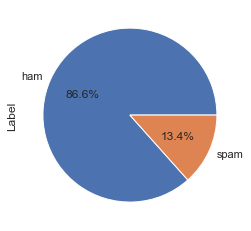

In [13]:
df['Label'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

- __86.6% of Ham and 13.4% of Spam Messages__  

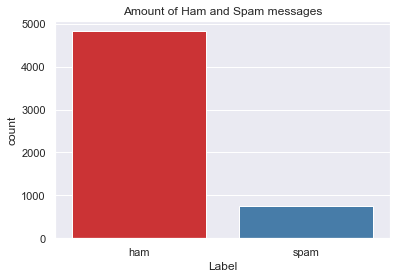

In [14]:
sns.countplot(data = df, x= df["Label"],palette="Set1").set_title("Amount of Ham and Spam messages")
plt.show()

In [15]:
# Mapping HAM as 0 and SPAM as 1

df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})
df.head()

Label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                                       Message  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

In [16]:
spam_df = df[df['Label'] == 1 ] #create sub-dataframe of spam text
ham_df = df[df['Label'] == 0 ] #sub-dataframe of ham text

In [17]:
#Extract SPAM messages
spam_messages = df[df["Label"]== 1]
spam_messages.head() #Display first 5 rows of SPAM messages

Label  \
2       1   
5       1   
8       1   
9       1   
11      1   

                                                                                                                                                           Message  
2      Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
5             FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv  
8   WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.  
9       Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030  
11                        SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

In [18]:
spam_messages.describe()

Label
count  747.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0

In [19]:
#Now let's create new feature "message length" and plot it to see if it's of any interest
df['length']=df['Message'].apply(len)
df.head()

Label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   length  
0     111  
1      29  
2     155  
3      49  
4      61

In [20]:
df.groupby('Label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
0      4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
1       747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [21]:
df['length'].max()

910

In [22]:
df.isna().sum()

Label      0
Message    0
length     0
dtype: int64

<h2> Distribution by Length </h2>

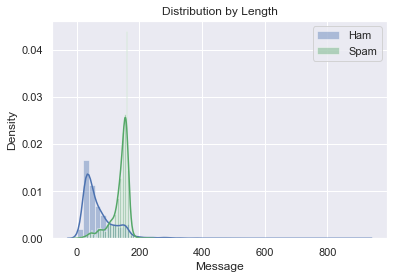

In [23]:
ham =df[df['Label'] == 0 ]['Message'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['Label'] == 1 ]['Message'].str.len()
sns.distplot(spam, label='Spam',color="g")

plt.title('Distribution by Length')
plt.legend()

plt.savefig('Distribution of word by length.png')

<function matplotlib.pyplot.show(close=None, block=None)>

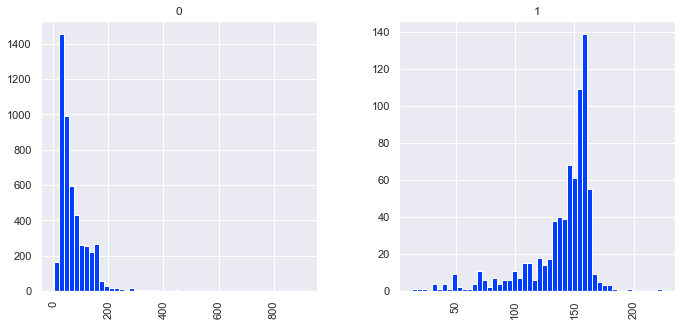

In [24]:

plt.style.use('seaborn-bright')
df.hist(column='length', by='Label', bins=50,figsize=(11,5))
plt.show

- __Looks like the lengthy is the message, more likely its Spam__

<h2> Length of the character in the Text </h2>

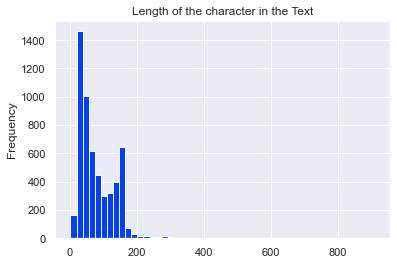

In [25]:
df['length'].plot(bins=50,kind='hist').set_title("Length of the character in the Text")
plt.savefig('Length of the character in the Message.png')

In [26]:
def plotLength():
    figure = plt.figure(figsize = [15, 7])
    sns.distplot(a = df['length'], color = 'purple')
    plt.xlabel('Length', size = 14)
    plt.ylabel('Density', size = 14)
    plt.title('Length of the character in the Message', size = 16)
    plt.show()


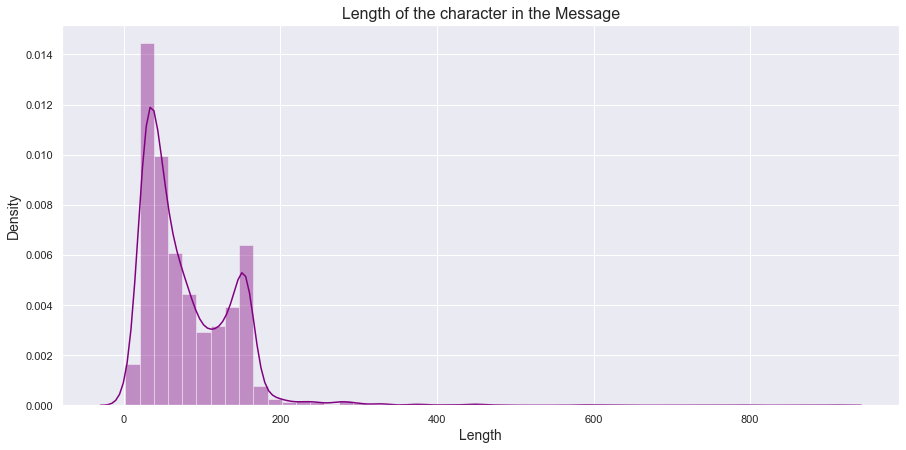

In [27]:
plotLength()

__Observation:__

- We can observe some positive skewness.

- There are very few messages who length in words is greater than 200.

In [28]:
df[df['length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<h2> Plotting by Digits </h2>

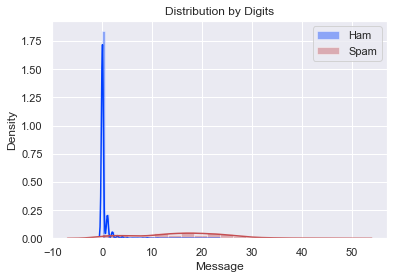

In [29]:
#plotting graph by digits.

ham1 = df[df['Label'] == 0 ]['Message'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['Label'] == 1 ]['Message'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam', color= 'r')
plt.title('Distribution by Digits')
plt.legend()
plt.savefig('Distrbution of word by Digits.png')

- __Ham has more digits and Spam has less__

<h2>Plotting by Non-Digits </h2>

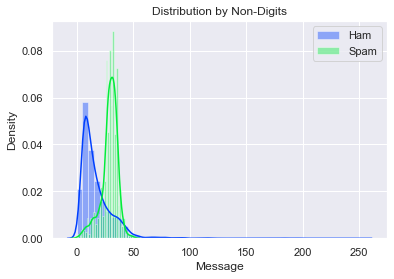

In [30]:
#plotting graph by non-digits.

ham1 = df[df['Label'] == 0 ]['Message'].str.replace(r'\w+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['Label'] == 1 ]['Message'].str.replace(r'\w+', '').str.len()
sns.distplot(spam1, label='Spam')

plt.title('Distribution by Non-Digits')
plt.legend()
plt.savefig('Distrbution of word by Non-Digits.png')

- __Spam has more non-digit__

<h2> Counting the frequent occurrence  of words </h2>

In [31]:
#for counting frequently occurrence of spam and ham.

count1 = Counter(" ".join(df[df['Label']== 0]["Message"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})


count2 = Counter(" ".join(df[df['Label']== 1]["Message"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

<h3> In HAM </h3>

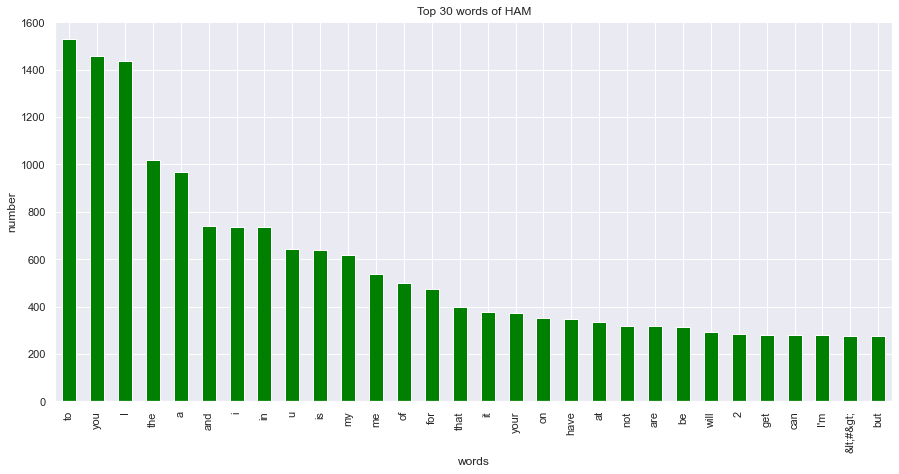

<Figure size 432x288 with 0 Axes>

In [32]:

data1.plot.bar(legend = False, color = 'green',figsize = (15,7))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of HAM')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

plt.savefig('Top30 words ham.png',dpi=199)

<h3> In SPAM </h3>

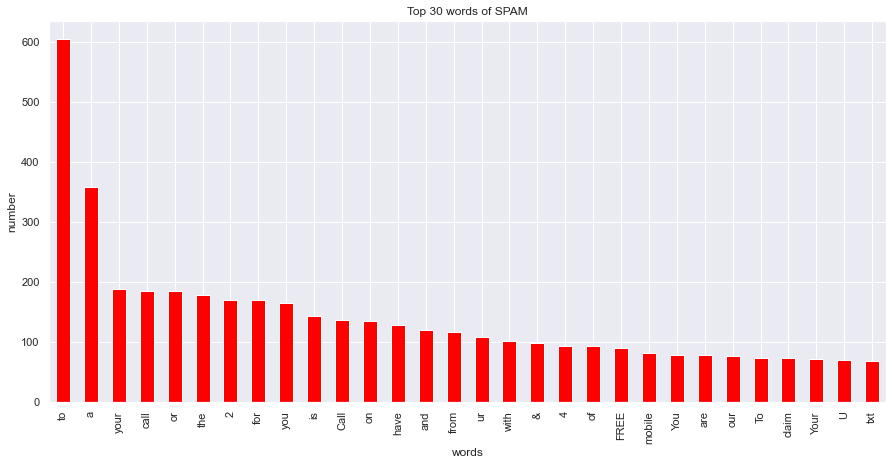

<Figure size 432x288 with 0 Axes>

In [33]:
data2.plot.bar(legend = False, color = 'red', figsize = (15,7))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of SPAM')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

plt.savefig('Top30 words spam.png',dpi=199)

<h2> Visualization Using Word Cloud </h2>

<h3> Spam Wordcloud</h3>

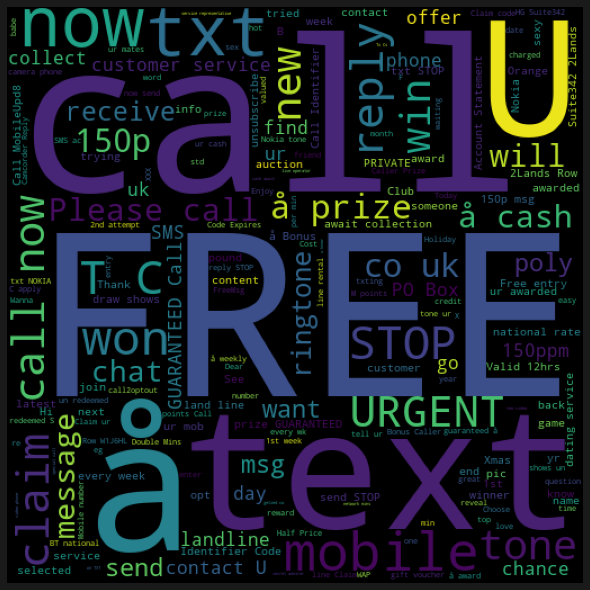

In [34]:
spam_words = ' '.join(list(df[df['Label'] == 1]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

<h3> Ham Wordcloud </h3>

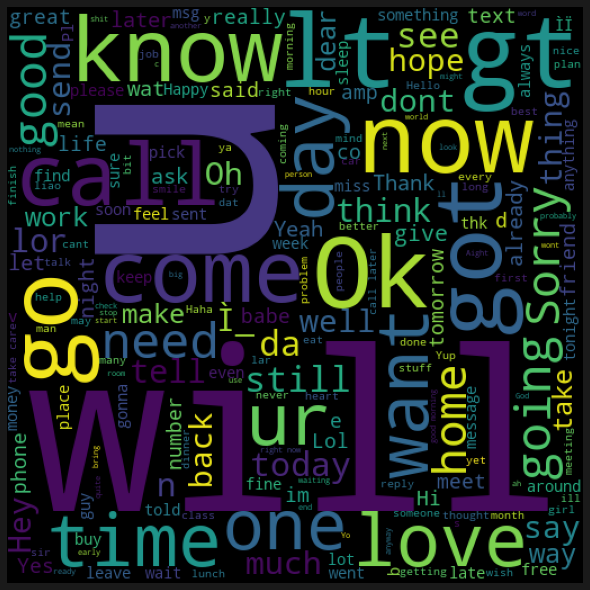

In [35]:
spam_words = ' '.join(list(df[df['Label'] == 0]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

<h1> Tokenization </h1>

- __The process of converting the normal text strings in to a list of tokens (words that we actually want).__
- __Printing lists of tokens (also known as lemmas)__ 

In [36]:
import string                  
mess = 'sample message!...'            # how string is used
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [37]:
nopunc.split()


['sample', 'message']

In [38]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
# Defining text process function 

def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
#creating copy of dataframe and take message only
df_msg = df['Message'].copy()

In [41]:
df_msg = df_msg.apply(text_process)

In [42]:
# Tokenization: process of converting the normal text strings in to a list of tokens (words that we actually want).
# Printing lists of tokens (also known as lemmas) 
df['Message'].head(5).apply(text_process)

0                                                                [Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]
1                                                                                                                                     [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receive, entry, questionstd, txt, rateTCs, apply, 08452810075over18s]
3                                                                                                                      [U, dun, say, early, hor, U, c, already, say]
4                                                                                                               [Nah, dont, think, goes, usf, lives, around, though]
Name: Message, dtype: object

- __Splitting words using Tokens__

In [43]:
df.head()

Label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                                       Message  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   length  
0     111  
1      29  
2     155  
3      49  
4      61

In [44]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [45]:
ss = nltk.SnowballStemmer("english")
df['Message'] = df['Message'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))

In [46]:
nltk.download('punkt')
sms_df = df['Message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
     
all_words = nltk.FreqDist(all_words)  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 8920


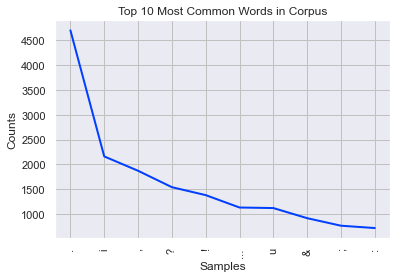

In [48]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');

In [49]:
documents= df['Message']

#fun for lowercase

def lowercase(doc):
  return [d.lower() for d in documents]

lowerCaseDoc = lowercase(doc=documents)
print(lowerCaseDoc)

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...', 'ok lar... joke wif u oni...', 'free entri 2 wkli comp win fa cup final tkts 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c appli 08452810075over18', 'u dun say earli hor... u c alreadi say...', 'nah i think goe usf, live around though', "freemsg hey darl 3 week word back! i'd like fun still? tb ok! xxx std chgs send, å£1.50 rcv", 'even brother like speak me. they treat like aid patent.', 'as per request mell mell (oru minnaminungint nurungu vettam) set callertun callers. press *9 copi friend callertun', 'winner!! as valu network custom select receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hour only.', 'had mobil 11 month more? u r entitl updat latest colour mobil camera free! call the mobil updat co free 08002986030', "i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.", 'six chanc win cash! from 100 20,000 pound t

In [50]:
#function to remove punctuation


def removePunctuation(doc):

  nonPunch = []
  
  for i in doc:
    nonPunch.append(i.translate(str.maketrans("", "", string.punctuation)))

  return nonPunch

In [51]:
removePunch = removePunctuation(doc=lowerCaseDoc)
print(removePunch)

['go jurong point crazy avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkts 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18', 'u dun say earli hor u c alreadi say', 'nah i think goe usf live around though', 'freemsg hey darl 3 week word back id like fun still tb ok xxx std chgs send å£150 rcv', 'even brother like speak me they treat like aid patent', 'as per request mell mell oru minnaminungint nurungu vettam set callertun callers press 9 copi friend callertun', 'winner as valu network custom select receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour only', 'had mobil 11 month more u r entitl updat latest colour mobil camera free call the mobil updat co free 08002986030', 'im gonna home soon want talk stuff anymor tonight k iv cri enough today', 'six chanc win cash from 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandc appl

In [52]:
#function  to tokenize

def tokenize(doc):
  return [[w for w in d.split()] for d in doc]

In [53]:
tokenDoc = tokenize(doc=removePunch)
print(tokenDoc)

[['go', 'jurong', 'point', 'crazy', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['ok', 'lar', 'joke', 'wif', 'u', 'oni'], ['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc', 'appli', '08452810075over18'], ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'], ['nah', 'i', 'think', 'goe', 'usf', 'live', 'around', 'though'], ['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'å£150', 'rcv'], ['even', 'brother', 'like', 'speak', 'me', 'they', 'treat', 'like', 'aid', 'patent'], ['as', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'callers', 'press', '9', 'copi', 'friend', 'callertun'], ['winner', 'as', 'valu', 'network', 'custom', 'select', 'receivea', 'å£900', 'prize', 'reward', 'to',

In [54]:
# function to count frequency

def CountFreq(doc):
  return [Counter(d) for d in doc]

In [55]:
freqDoc = CountFreq(doc=tokenDoc)
pprint.pprint(freqDoc)

[Counter({'go': 1,
          'jurong': 1,
          'point': 1,
          'crazy': 1,
          'avail': 1,
          'bugi': 1,
          'n': 1,
          'great': 1,
          'world': 1,
          'la': 1,
          'e': 1,
          'buffet': 1,
          'cine': 1,
          'got': 1,
          'amor': 1,
          'wat': 1}),
 Counter({'ok': 1, 'lar': 1, 'joke': 1, 'wif': 1, 'u': 1, 'oni': 1}),
 Counter({'entri': 2,
          'fa': 2,
          'free': 1,
          '2': 1,
          'wkli': 1,
          'comp': 1,
          'win': 1,
          'cup': 1,
          'final': 1,
          'tkts': 1,
          '21st': 1,
          'may': 1,
          '2005': 1,
          'text': 1,
          '87121': 1,
          'receiv': 1,
          'questionstd': 1,
          'txt': 1,
          'ratetc': 1,
          'appli': 1,
          '08452810075over18': 1}),
 Counter({'u': 2,
          'say': 2,
          'dun': 1,
          'earli': 1,
          'hor': 1,
          'c': 1,
          'alre

          'burger': 1,
          'way': 1,
          'home': 1,
          'i': 1,
          'cant': 1,
          'even': 1,
          'move': 1,
          'pain': 1,
          'kill': 1,
          'me': 1}),
 Counter({'ha': 3, 'good': 1, 'joke': 1, 'girl': 1, 'situat': 1, 'seekers': 1}),
 Counter({'it': 1, 'part': 1, 'check': 1, 'iq': 1}),
 Counter({'sorri': 1,
          'roommat': 1,
          'took': 1,
          'forever': 1,
          'ok': 1,
          'i': 1,
          'come': 1,
          'now': 1}),
 Counter({'said': 2,
          'cut': 2,
          'ok': 1,
          'lar': 1,
          'doubl': 1,
          'check': 1,
          'wif': 1,
          'da': 1,
          'hair': 1,
          'dresser': 1,
          'alreadi': 1,
          'wun': 1,
          'v': 1,
          'short': 1,
          'he': 1,
          'look': 1,
          'nice': 1}),
 Counter({'as': 1,
          'valu': 1,
          'customer': 1,
          'i': 1,
          'pleas': 1,
          'advis': 1,
     

          'get': 1,
          'tire': 1,
          '4': 1,
          'lovabl': 1,
          'persons': 1,
          'cozsomtim': 1,
          'occupi': 1,
          'biggest': 1,
          'part': 1,
          'hearts': 1,
          'gud': 1,
          'ni8': 1}),
 Counter({'i': 1,
          'know': 1,
          'are': 1,
          'can': 1,
          'pls': 1,
          'open': 1,
          'back': 1}),
 Counter({'yes': 1, 'see': 1, 'ya': 1, 'dot': 1}),
 Counter({'what': 1, 'staff': 1, 'name': 1, 'take': 1, 'class': 1, 'us': 1}),
 Counter({'repli': 2,
          'freemsg': 1,
          'whi': 1,
          'text': 1,
          'im': 1,
          'randy': 1,
          'sexy': 1,
          'femal': 1,
          'live': 1,
          'local': 1,
          'luv': 1,
          'hear': 1,
          'u': 1,
          'netcollex': 1,
          'ltd': 1,
          '08700621170150p': 1,
          'per': 1,
          'msg': 1,
          'stop': 1,
          'end': 1}),
 Counter({'ummmawil': 1,
    

          'or': 1,
          'everi': 1,
          'stool': 1}),
 Counter({'how': 1,
          'doing': 1,
          'hope': 1,
          'settl': 1,
          'new': 1,
          'school': 1,
          'year': 1,
          'just': 1,
          'wishin': 1,
          'gr8': 1,
          'day': 1}),
 Counter({'gud': 1, 'mrng': 1, 'dear': 1, 'hav': 1, 'nice': 1, 'day': 1}),
 Counter({'did': 1, 'u': 1, 'got': 1, 'person': 1, 'stori': 1}),
 Counter({'hamster': 1,
          'dead': 1,
          'hey': 1,
          'tmr': 1,
          'meet': 1,
          '1pm': 1,
          'orchard': 1,
          'mrt': 1}),
 Counter({'hi': 1,
          'kate': 1,
          'evening': 1,
          'i': 1,
          'hope': 1,
          'see': 1,
          'tomorrow': 1,
          'bit': 1,
          'bloodi': 1,
          'babyjontet': 1,
          'txt': 1,
          'back': 1,
          'u': 1,
          'can': 1,
          'xxx': 1}),
 Counter({'found': 1, 'it': 1, 'enc': 1, 'ltgt': 1, 'at': 1}),
 Count

          'one': 1,
          'real': 1,
          'sense': 1}),
 Counter({'hey': 1, 'told': 1, 'name': 1, 'gautham': 1, 'ah': 1}),
 Counter({'haf': 1,
          'u': 1,
          'found': 1,
          'him': 1,
          'i': 1,
          'feel': 1,
          'stupid': 1,
          'da': 1,
          'v': 1,
          'cam': 1,
          'working': 1}),
 Counter({'oops': 1, '4': 1, 'got': 1, 'bit': 1}),
 Counter({'are': 1, 'much': 1, 'buzi': 1}),
 Counter({'i': 1,
          'accident': 1,
          'delet': 1,
          'message': 1,
          'resend': 1,
          'please': 1}),
 Counter({'tmobil': 1,
          'custom': 1,
          'may': 1,
          'claim': 1,
          'free': 1,
          'camera': 1,
          'phone': 1,
          'upgrad': 1,
          'pay': 1,
          'go': 1,
          'sim': 1,
          'card': 1,
          'loyalty': 1,
          'call': 1,
          '0845': 1,
          '021': 1,
          '3680offer': 1,
          'end': 1,
          '28thfebtc':

          'suzi': 1,
          '69876': 1,
          'txts': 1,
          'cost': 1,
          '150': 1,
          'per': 1,
          'msg': 1,
          'tncs': 1,
          'website': 1,
          'x': 1}),
 Counter({'just': 1,
          'check': 1,
          'you': 1,
          'realli': 1,
          'miss': 1,
          'see': 1,
          'jeremiah': 1,
          'do': 1,
          'great': 1,
          'month': 1}),
 Counter({'nah': 1,
          'cant': 1,
          'help': 1,
          'there': 1,
          'iv': 1,
          'never': 1,
          'iphon': 1}),
 Counter({'if': 1,
          'car': 1,
          'hour': 1,
          'half': 1,
          'im': 1,
          'go': 1,
          'apeshit': 1}),
 Counter({'ever': 2,
          'you': 2,
          'plz': 2,
          'today': 1,
          'sorri': 1,
          'day': 1,
          'if': 1,
          'angri': 1,
          'misbehav': 1,
          'hurt': 1,
          'just': 1,
          'slap': 1,
          'urself': 1,
  

          'result': 1,
          'consist': 1,
          'intellig': 1,
          'kind': 1,
          'start': 1,
          'ask': 1,
          'practicum': 1,
          'link': 1,
          'keep': 1,
          'ear': 1,
          'open': 1,
          'best': 1,
          'ttyl': 1}),
 Counter({'ya': 4,
          '120': 1,
          'call': 1,
          'cost': 1,
          'which': 1,
          'guess': 1,
          'isnt': 1,
          'bad': 1,
          'miss': 1,
          'need': 1,
          'want': 1,
          'love': 1}),
 Counter({'go': 1,
          'thru': 1,
          'differ': 1,
          'feelingwav': 1,
          'decis': 1,
          'cope': 1,
          'individualtim': 1,
          'heal': 1,
          'everyth': 1,
          'believe': 1}),
 Counter({'where': 1,
          'u': 1,
          'go': 1,
          'my': 1,
          'phone': 1,
          'gonna': 1,
          'die': 1,
          'stay': 1}),
 Counter({'great': 1,
          'never': 1,
          'better

          'b': 1,
          'ard': 1,
          '4': 1,
          'christmas': 1,
          'but': 1,
          'enjoy': 1,
          'n': 1,
          'merri': 1,
          'xmas': 1}),
 Counter({'offer': 2,
          'today': 1,
          'claim': 1,
          'ur': 1,
          'å£150': 1,
          'worth': 1,
          'discount': 1,
          'vouchers': 1,
          'text': 1,
          'yes': 1,
          '85023': 1,
          'now': 1,
          'savamob': 1,
          'member': 1,
          'mobile': 1,
          't': 1,
          'cs': 1,
          '08717898035': 1,
          'å£300': 1,
          'sub': 1,
          '16': 1,
          'unsub': 1,
          'repli': 1,
          'x': 1}),
 Counter({'yes': 1, 'how': 1, 'pretti': 1, 'ladi': 1, 'like': 1, 'single': 1}),
 Counter({'you': 1,
          'reciev': 1,
          'tone': 1,
          'within': 1,
          'next': 1,
          '24hrs': 1,
          'for': 1,
          'term': 1,
          'condit': 1,
          'pleas'

          '150ppm': 1}),
 Counter({'that': 1,
          'cool': 1,
          'sometim': 1,
          'slow': 1,
          'gentle': 1,
          'sonetim': 1,
          'rough': 1,
          'hard': 1}),
 Counter({'im': 1,
          'gonna': 1,
          'say': 1,
          'no': 1,
          'sorry': 1,
          'i': 1,
          'would': 1,
          'normal': 1,
          'start': 1,
          'panic': 1,
          'time': 1,
          'sorri': 1,
          'again': 1,
          'are': 1,
          'see': 1,
          'tuesday': 1}),
 Counter({'wait': 1,
          'know': 1,
          'wesley': 1,
          'town': 1,
          'i': 1,
          'bet': 1,
          'hella': 1,
          'drugs': 1}),
 Counter({'fine': 1, 'miss': 1, 'much': 1}),
 Counter({'did': 1, 'u': 1, 'got': 1, 'person': 1, 'stori': 1}),
 Counter({'tell': 1, 'drug': 1, 'dealer': 1, 'get': 1, 'impati': 1}),
 Counter({'cant': 3,
          'come': 3,
          'send': 3,
          'luv': 2,
          'u': 2,
     

          'time': 1,
          'night': 1,
          'g': 1,
          'want': 1,
          'day': 1,
          'shitstorm': 1,
          'attribut': 1,
          'alway': 1,
          'make': 1,
          'everyon': 1}),
 Counter({'08714712388': 1, '10am7pm': 1, 'cost': 1, '10p': 1}),
 Counter({'account': 2,
          'save': 1,
          'stress': 1,
          'if': 1,
          'person': 1,
          'dorm': 1,
          'send': 1,
          'detail': 1,
          'money': 1,
          'sent': 1,
          'you': 1}),
 Counter({'know': 2,
          'he': 1,
          'also': 1,
          'lunch': 1,
          'menu': 1,
          'da': 1,
          'i': 1}),
 Counter({'when': 1, 'stuff': 1, 'sell': 1, 'ill': 1, 'tell': 1}),
 Counter({'449071512431': 1,
          'urgent': 1,
          'this': 1,
          '2nd': 1,
          'attempt': 1,
          'contact': 1,
          'uu': 1,
          'won': 1,
          'å£1250': 1,
          'call': 1,
          '09071512433': 1,
          '

          'å£3': 1,
          'per': 1,
          'pole': 1,
          'unsub': 1,
          '08718727870': 1}),
 Counter({'gud': 1, 'mrng': 1, 'dear': 1, 'hav': 1, 'nice': 1, 'day': 1}),
 Counter({'this': 1,
          'hope': 1,
          'enjoy': 1,
          'game': 1,
          'yesterday': 1,
          'sorri': 1,
          'iv': 1,
          'touch': 1,
          'pls': 1,
          'know': 1,
          'fond': 1,
          'bein': 1,
          'thot': 1,
          'off': 1,
          'have': 1,
          'great': 1,
          'week': 1,
          'abiola': 1}),
 Counter({'all': 1, 'e': 1, 'best': 1, '4': 1, 'ur': 1, 'drive': 1, 'tmr': 1}),
 Counter({'ywhere': 1,
          'u': 1,
          'at': 1,
          'dogbreath': 1,
          'it': 1,
          'just': 1,
          'sound': 1,
          'like': 1,
          'jan': 1,
          'c': 1,
          'thatåõ': 1,
          'al': 1}),
 Counter({'i': 3,
          'omg': 1,
          'want': 1,
          'scream': 1,
          'w

          'see': 1,
          'could': 1,
          'meet': 1}),
 Counter({'go': 1, 'take': 1, 'babe': 1}),
 Counter({'hai': 1,
          'ana': 1,
          'tomarrow': 1,
          'come': 1,
          'morning': 1,
          'ltdecimalgt': 1,
          'ill': 1,
          'sathi': 1,
          'go': 1,
          'rto': 1,
          'office': 1,
          'repli': 1,
          'came': 1,
          'home': 1}),
 Counter({'spoon': 1, 'okay': 1}),
 Counter({'did': 1, 'say': 1, 'somebodi': 1, 'name': 1, 'tampa': 1}),
 Counter({'in': 1, 'work': 1, 'now': 1, 'go': 1, 'min': 1}),
 Counter({'your': 1, 'brother': 1, 'genius': 1}),
 Counter({'i': 2,
          'sorry': 1,
          'guess': 1,
          'whenev': 1,
          'get': 1,
          'hold': 1,
          'connections': 1,
          'mayb': 1,
          'hour': 1,
          'two': 1,
          'ill': 1,
          'text': 1}),
 Counter({'did': 1,
          'u': 1,
          'find': 1,
          'time': 1,
          'bus': 1,
         

          'how': 1,
          'photo': 1,
          'useful': 1}),
 Counter({'ur': 2,
          'cashbal': 1,
          'current': 1,
          '500': 1,
          'pound': 1,
          'maxim': 1,
          'cashin': 1,
          'send': 1,
          'go': 1,
          '86688': 1,
          '150pmsg': 1,
          'cc': 1,
          '08718720201': 1,
          'po': 1,
          'box': 1,
          '11414': 1,
          'tcrw1': 1}),
 Counter({'sat': 2,
          'hey': 1,
          'book': 1,
          'kb': 1,
          'already': 1,
          'lesson': 1,
          'go': 1,
          'ah': 1,
          'keep': 1,
          'night': 1,
          'free': 1,
          'need': 1,
          'meet': 1,
          'confirm': 1,
          'lodg': 1}),
 Counter({'chk': 1, 'ur': 1, 'belovd': 1, 'ms': 1, 'dict': 1}),
 Counter({'is': 1, 'time': 1, 'want': 1, 'come': 1}),
 Counter({'awesome': 1, 'lemm': 1, 'know': 1, 'whenev': 1, 'around': 1}),
 Counter({'shb': 1, 'b': 1, 'ok': 1, 'lor': 1, 'tha

          'wat': 1,
          'time': 1,
          'e': 1,
          'place': 1,
          'dat': 1,
          'sell': 1,
          '4d': 1,
          'closes': 1}),
 Counter({'got': 2,
          'i': 1,
          'anoth': 1,
          'job': 1,
          'the': 1,
          'one': 1,
          'hospit': 1,
          'data': 1,
          'analysi': 1,
          'something': 1,
          'start': 1,
          'monday': 1,
          'not': 1,
          'sure': 1,
          'thesi': 1,
          'finish': 1}),
 Counter({'jay': 1, 'get': 1, 'realli': 1, 'impati': 1, 'belliger': 1}),
 Counter({'2': 2,
          'hiya': 1,
          'comin': 1,
          'bristol': 1,
          '1': 1,
          'st': 1,
          'week': 1,
          'in': 1,
          'april': 1,
          'les': 1,
          'got': 1,
          'off': 1,
          'rudi': 1,
          'on': 1,
          'new': 1,
          'yrs': 1,
          'eve': 1,
          'but': 1,
          'i': 1,
          'was': 1,
          's

          'sick': 1,
          'slept': 1,
          'day': 1,
          'yesterday': 1}),
 Counter({'sorri': 1,
          'man': 1,
          'accident': 1,
          'left': 1,
          'phone': 1,
          'silent': 1,
          'last': 1,
          'night': 1,
          'check': 1,
          'til': 1,
          'i': 1,
          'got': 1}),
 Counter({'hey': 1,
          'someth': 1,
          'came': 1,
          'last': 1,
          'min': 1,
          'think': 1,
          'wun': 1,
          'sign': 1,
          'tmr': 1,
          'hee': 1}),
 Counter({'dont': 2,
          'he': 1,
          'adult': 1,
          'would': 1,
          'learn': 1,
          'experience': 1,
          'there': 1,
          'real': 1,
          'danger': 1,
          'i': 1,
          'like': 1,
          'peep': 1,
          'use': 1,
          'drug': 1,
          'need': 1,
          'but': 1,
          'comment': 1}),
 Counter({'hey': 1, 'there': 1, 'veggi': 1, 'pizza': 1}),
 Counter({'yun':

          'immedi': 1,
          'urgent': 1,
          'messag': 1,
          'wait': 1}),
 Counter({'like': 3,
          'yeah': 1,
          'goe': 1,
          'friend': 1,
          'imma': 1,
          'flip': 1,
          'shit': 1,
          'half': 1,
          'hour': 1}),
 Counter({'go': 2,
          'mum': 1,
          'say': 1,
          'wan': 1,
          'then': 1,
          'shun': 1,
          'bian': 1,
          'watch': 1,
          'da': 1,
          'glass': 1,
          'exhibition': 1}),
 Counter({'what': 1, 'plan': 1, 'pongal': 1}),
 Counter({'just': 1,
          'wait': 1,
          'till': 1,
          'end': 1,
          'march': 1,
          'el': 1,
          'nino': 1,
          'get': 1,
          'himself': 1,
          'oh': 1}),
 Counter({'not': 1,
          'yet': 1,
          'chikkugo': 1,
          'room': 1,
          'nw': 1,
          'im': 1,
          'bus': 1}),
 Counter({'am': 1, 'also': 1, 'cbe': 1, 'only': 1, 'but': 1, 'pay': 1}),
 Count

 Counter({'pleas': 2,
          'get': 2,
          'yetunde': 1,
          'im': 1,
          'sorri': 1,
          'moji': 1,
          'seem': 1,
          'busi': 1,
          'abl': 1,
          'go': 1,
          'shopping': 1,
          'can': 1,
          'find': 1,
          'way': 1,
          'want': 1,
          'us': 1,
          'forgiv': 1,
          'me': 1,
          'you': 1,
          'repli': 1,
          'free': 1,
          'via': 1,
          'yahoo': 1,
          'messenger': 1}),
 Counter({'you': 2,
          'hey': 1,
          'realli': 1,
          'pretti': 1,
          'late': 1,
          'want': 1,
          'go': 1,
          'lesson': 1,
          'first': 1,
          'i': 1,
          'join': 1,
          'im': 1,
          'reach': 1,
          'tp': 1,
          'mrt': 1}),
 Counter({'hot': 1,
          'live': 1,
          'fantasi': 1,
          'call': 1,
          '08707509020': 1,
          'just': 1,
          '20p': 1,
          'per': 1,
  

 Counter({'2': 2,
          'free': 1,
          '1st': 1,
          'week': 1,
          'entri': 1,
          'textpod': 1,
          '4': 1,
          'chanc': 1,
          'win': 1,
          '40gb': 1,
          'ipod': 1,
          'å£250': 1,
          'cash': 1,
          'everi': 1,
          'wk': 1,
          'txt': 1,
          'pod': 1,
          '84128': 1,
          'tscs': 1,
          'wwwtextpodnet': 1,
          'custcar': 1,
          '08712405020': 1}),
 Counter({'those': 1, 'duck': 1, 'chinchilla': 1}),
 Counter({'i': 1, 'marriag': 1, 'function': 1}),
 Counter({'u': 2,
          'look': 1,
          'like': 1,
          'wil': 1,
          'b': 1,
          'get': 1,
          'headstart': 1,
          'im': 1,
          'leav': 1,
          'bout': 1,
          '230ish': 1,
          'r': 1,
          'desper': 1,
          'compani': 1,
          'i': 1,
          'could': 1,
          'head': 1,
          'earlierw': 1,
          'goin': 1,
          'meet': 1,

          'wonder': 1,
          'moment': 1,
          'might': 1,
          'come': 1,
          'want': 1,
          'send': 1,
          'someon': 1,
          'yahoo': 1,
          'connect': 1,
          'sucks': 1,
          'rememb': 1,
          'set': 1,
          'page': 1,
          'format': 1,
          'disc': 1,
          'could': 1,
          'tell': 1,
          'or': 1,
          'know': 1,
          'way': 1,
          'big': 1,
          'becaus': 1,
          'stuff': 1,
          'direct': 1,
          'internet': 1,
          'ani': 1,
          'help': 1,
          'would': 1,
          'great': 1,
          'prey': 1,
          'teas': 1,
          'kiss': 1}),
 Counter({'how': 1, 'champ': 1, 'leav': 1, 'glasgow': 1}),
 Counter({'kall': 1, 'bestcongrats': 1}),
 Counter({'i': 1, 'wonder': 1, 'get': 1, 'text': 1}),
 Counter({'i': 1,
          'need': 1,
          'come': 1,
          'home': 1,
          'give': 1,
          'good': 1,
          'lovin': 1}),
 C

          'good': 2,
          'give': 2,
          'u': 2,
          'never': 1,
          'blame': 1,
          'ur': 1,
          'happiness': 1,
          'bad': 1,
          'experience': 1,
          'both': 1,
          'essenti': 1,
          'all': 1,
          'god': 1,
          'blessings': 1,
          'morning': 1}),
 Counter({'pls': 1, 'confirm': 1, 'time': 1, 'collect': 1, 'cheque': 1}),
 Counter({'as': 1,
          'regist': 1,
          'subscrib': 1,
          'yr': 1,
          'draw': 1,
          '4': 1,
          'å£100': 1,
          'gift': 1,
          'voucher': 1,
          'b': 1,
          'enter': 1,
          'receipt': 1,
          'correct': 1,
          'ans': 1,
          'when': 1,
          'next': 1,
          'olympics': 1,
          'txt': 1,
          'an': 1,
          '80062': 1}),
 Counter({'urgent': 1,
          'your': 1,
          'mobil': 1,
          'number': 1,
          'award': 1,
          'å£2000': 1,
          'prize': 1,
       

          'today': 1,
          'day': 1,
          'which': 1,
          'u': 1,
          'send': 1,
          'ur': 1,
          'valuabl': 1,
          'frnds': 1,
          'first': 1,
          'rpli': 1}),
 Counter({'okay': 1, 'we': 1, 'wait': 1, 'ah': 1}),
 Counter({'y': 1, 'lei': 1}),
 Counter({'u': 2,
          'so': 2,
          'me': 2,
          'hi': 1,
          'babe': 1,
          'r': 1,
          'most': 1,
          'like': 1,
          'to': 1,
          'be': 1,
          'in': 1,
          'bed': 1,
          'but': 1,
          'im': 1,
          'sorri': 1,
          'about': 1,
          'tonight': 1,
          'i': 1,
          'realli': 1,
          'wanna': 1,
          'see': 1,
          'tomorrow': 1,
          'call': 1,
          'at': 1,
          '9': 1,
          'love': 1,
          'xxx': 1}),
 Counter({'alreadi': 1, 'squat': 1, 'new': 1, 'way': 1, 'walk': 1}),
 Counter({'do': 1, 'want': 1, 'bold': 1, '2': 1, 'bb': 1, 'torch': 1}),
 Counter({'cram

          'fall': 2,
          'search': 1,
          'let': 1,
          'find': 1,
          'that': 1,
          'call': 1,
          'bcoz': 1,
          'forc': 1,
          'yourself': 1,
          'know': 1,
          'smeon': 1,
          'hold': 1,
          'bslvyl': 1}),
 Counter({'i': 2,
          'u': 2,
          'dun': 1,
          'believ': 1,
          'thk': 1,
          'told': 1,
          'him': 1}),
 Counter({'gap': 2,
          'do': 1,
          'know': 1,
          'god': 1,
          'creat': 1,
          'fingers': 1,
          'so': 1,
          'that': 1,
          'one': 1,
          'made': 1,
          'come': 1,
          'amp': 1,
          'fill': 1,
          'hold': 1,
          'hand': 1,
          'love': 1}),
 Counter({'yessura': 1, 'sun': 1, 'tvlol': 1}),
 Counter({'arun': 1, 'u': 1, 'transfr': 1, 'amt': 1}),
 Counter({'takin': 1,
          'shower': 1,
          'yeah': 1,
          'ill': 1,
          'leav': 1,
          'im': 1,
          'd

          'usb': 1}),
 Counter({'oh': 1,
          'ok': 1,
          'didnt': 1,
          'know': 1,
          'meant': 1,
          'yep': 1,
          'babi': 1,
          'jontin': 1}),
 Counter({'you': 1,
          'won': 1,
          'guarante': 1,
          'å£1000': 1,
          'cash': 1,
          'å£2000': 1,
          'prizeto': 1,
          'claim': 1,
          'yr': 1,
          'prize': 1,
          'call': 1,
          'custom': 1,
          'servic': 1,
          'repres': 1}),
 Counter({'would': 1,
          'like': 1,
          'see': 1,
          'xxx': 1,
          'pic': 1,
          'hot': 1,
          'near': 1,
          'ban': 1,
          'uk': 1}),
 Counter({'hmv': 3,
          'bonus': 1,
          'special': 1,
          '500': 1,
          'pound': 1,
          'genuin': 1,
          'voucher': 1,
          'won': 1,
          'just': 1,
          'answer': 1,
          '4': 1,
          'easi': 1,
          'questions': 1,
          'play': 1,
        

          '2': 1,
          'wrks': 1,
          'j': 1,
          'wot': 1,
          'bout': 1,
          'u': 1}),
 Counter({'then': 1,
          'eat': 1,
          'shit': 1,
          'wait': 1,
          'ur': 1,
          'monkey': 1,
          'face': 1,
          'bitch': 1,
          'u': 1,
          'asshole': 1}),
 Counter({'good': 1, 'night': 1, 'am': 1, 'go': 1, 'sleep': 1}),
 Counter({'aight': 1,
          'ill': 1,
          'grab': 1,
          'someth': 1,
          'eat': 1,
          'too': 1,
          'text': 1,
          'back': 1,
          'mu': 1}),
 Counter({'kkwhi': 1, 'cant': 1, 'come': 1, 'search': 1, 'job': 1}),
 Counter({'take': 1,
          'someth': 1,
          'pain': 1,
          'if': 1,
          'move': 1,
          'howev': 1,
          'side': 1,
          'next': 1,
          '6hrs': 1,
          'see': 1,
          'doctor': 1}),
 Counter({'lol': 1,
          'oh': 1,
          'babe': 1,
          'i': 1,
          'wont': 1,
          'sl

          'must': 1,
          'food': 1,
          'gari': 1,
          'someth': 1,
          '9ja': 1,
          'miss': 1}),
 Counter({'you': 1, 'alway': 1, 'make': 1, 'thing': 1, 'bigger': 1}),
 Counter({'ìï': 1, 'dun': 1, 'wan': 1, 'watch': 1, 'infern': 1, 'affair': 1}),
 Counter({'me': 1, 'wake': 1, '4': 1, 'afternoon': 1, 'sup': 1}),
 Counter({'phone': 2,
          'free': 2,
          '4mths': 1,
          'half': 1,
          'price': 1,
          'orang': 1,
          'line': 1,
          'rental': 1,
          'latest': 1,
          'camera': 1,
          '4': 1,
          'had': 1,
          '11mths': 1,
          'call': 1,
          'mobilesdirect': 1,
          '08000938767': 1,
          'updat': 1,
          'now': 1,
          'or2stoptxt': 1}),
 Counter({'i': 1, 'send': 1, 'pic': 1, 'like': 1}),
 Counter({'okay': 1,
          'i': 1,
          'book': 1,
          'already': 1,
          'includ': 1,
          'one': 1,
          'bugis': 1}),
 Counter({'aight': 1, 

          'å£1450': 1,
          'prize': 1,
          'claim': 1,
          'call': 1,
          '09050002311': 1,
          'b4280703': 1,
          'tcsstop': 1,
          'sms': 1,
          '08718727868': 1,
          'over': 1,
          '18': 1,
          '150ppm': 1}),
 Counter({'feel': 2,
          'someon': 2,
          'it': 2,
          'beauti': 1,
          'truth': 1,
          'gravity': 1,
          'read': 1,
          'carefully': 1,
          'our': 1,
          'heart': 1,
          'light': 1,
          'but': 1,
          'heavi': 1,
          'leav': 1,
          'good': 1,
          'night': 1}),
 Counter({'sorri': 1,
          'im': 1,
          'get': 1,
          'now': 1,
          'feel': 1,
          'realli': 1,
          'bad': 1,
          'total': 1,
          'reject': 1,
          'kinda': 1,
          'thing': 1}),
 Counter({'you': 1, 'got': 1, 'shitload': 1, 'diamond': 1, 'though': 1}),
 Counter({'birthday': 2,
          'tessypl': 1,
          'f

          'juz': 1,
          'accordin': 1,
          'wat': 1,
          'discuss': 1,
          'yest': 1,
          'lor': 1,
          'except': 1,
          'sun': 1,
          'cos': 1,
          'there': 1,
          'nt': 1,
          'much': 1,
          'lesson': 1,
          'attend': 1,
          'sat': 1}),
 Counter({'free': 2,
          'come': 2,
          'also': 2,
          'k': 1,
          'wen': 1,
          'ur': 1,
          'home': 1,
          'tel': 1,
          'vikki': 1,
          'hav': 1,
          'sent': 1,
          'mail': 1,
          'better': 1,
          'even': 1,
          'il': 1,
          'today': 1,
          'aftr': 1,
          '6pm': 1}),
 Counter({'noth': 1,
          'get': 1,
          'msgs': 1,
          'dis': 1,
          'name': 1,
          'wit': 1,
          'differ': 1,
          'nos': 1}),
 Counter({'good': 1, 'morn': 1, 'plz': 1, 'call': 1, 'sir': 1}),
 Counter({'what': 1,
          'room': 1,
          'number': 1,
      

          'free': 1,
          'great': 1,
          'prizeswith': 1}),
 Counter({'so': 1, 'guy': 1, 'do': 1}),
 Counter({'also': 1,
          'chat': 1,
          'awesom': 1,
          'make': 1,
          'regular': 1,
          'unless': 1,
          'see': 1,
          'person': 1}),
 Counter({'that': 1, 'signific': 1, 'dont': 1, 'worry': 1}),
 Counter({'that': 1, 'caus': 1, 'old': 1, 'i': 1, 'live': 1, 'high': 1}),
 Counter({'hai': 3,
          'se': 2,
          'nahi': 2,
          'wo': 2,
          'jo': 2,
          'waqt': 1,
          'pehl': 1,
          'naseeb': 1,
          'zyada': 1,
          'kisi': 1,
          'ko': 1,
          'kuch': 1,
          'miltazindgi': 1,
          'hum': 1,
          'socht': 1,
          'zindgi': 1,
          'ham': 1,
          'jeetey': 1}),
 Counter({'on': 1, 'way': 1, 'offic': 1, 'da': 1}),
 Counter({'in': 1, 'place': 1, 'want': 1, 'da': 1}),
 Counter({'this': 1, 'pain': 1, 'come': 1, 'wors': 1, 'time': 1}),
 Counter({'ok': 1})

          'realli': 1,
          'tri': 1,
          'see': 1,
          'anyon': 1,
          'els': 1,
          '4th': 1,
          'guy': 1,
          'commit': 1,
          'random': 1,
          'dude': 1}),
 Counter({'for': 1,
          'ur': 1,
          'chanc': 1,
          'win': 1,
          'å£250': 1,
          'cash': 1,
          'everi': 1,
          'wk': 1,
          'txt': 1,
          'play': 1,
          '83370': 1,
          'tsc': 1,
          'wwwmusictrivianet': 1,
          'custcar': 1,
          '08715705022': 1,
          '1x150pwk': 1}),
 Counter({'i': 1,
          'busi': 1,
          'juz': 1,
          'dun': 1,
          'wan': 1,
          '2': 1,
          'go': 1,
          'early': 1,
          'hee': 1}),
 Counter({'rightio': 1,
          '1148': 1,
          'then': 1,
          'well': 1,
          'arent': 1,
          'bright': 1,
          'earli': 1,
          'morning': 1}),
 Counter({'great': 1, 'im': 1, 'church': 1, 'now': 1, 'holla': 1,

          'hungry': 1}),
 Counter({'er': 1, 'yep': 1, 'sure': 1, 'props': 1}),
 Counter({'u': 2,
          'hiya': 1,
          'pay': 1,
          'money': 1,
          'account': 1,
          'if': 1,
          'so': 1,
          'thanks': 1,
          'got': 1,
          'pleasant': 1,
          'surpris': 1,
          'check': 1,
          'balanc': 1,
          'c': 1,
          'get': 1,
          'statement': 1,
          '4': 1,
          'acc': 1}),
 Counter({'u': 3,
          'nokia': 2,
          'free': 2,
          '6230': 1,
          'plus': 1,
          'digit': 1,
          'camera': 1,
          'this': 1,
          'get': 1,
          'win': 1,
          'auction': 1,
          'to': 1,
          'take': 1,
          'part': 1,
          'send': 1,
          '83383': 1,
          'now': 1,
          'pobox11414tcrw1': 1,
          '16': 1}),
 Counter({'ok': 2, 'ill': 1, 'send': 1, 'ltdecimalgt': 1}),
 Counter({'bognor': 1,
          'is': 1,
          'should': 1,
  

          'dollar': 1,
          'loan': 1,
          'you': 1,
          'ill': 1,
          'pay': 1,
          'back': 1,
          'mid': 1,
          'february': 1,
          'pls': 1}),
 Counter({'you': 1,
          'might': 1,
          'want': 1,
          'pull': 1,
          'case': 1,
          'plan': 1,
          'spend': 1,
          'can': 1,
          'i': 1,
          'much': 1,
          'confid': 1,
          'derek': 1,
          'taylor': 1,
          'money': 1,
          'manag': 1}),
 Counter({'do': 1, 'like': 1, 'shake': 1, 'booti': 1, 'danc': 1, 'floor': 1}),
 Counter({'text': 1, 'get': 1, 'off': 1, 'call': 1, 'phone': 1, 'problem': 1}),
 Counter({'no': 1, 'need': 1, 'drug': 1, 'anymore': 1}),
 Counter({'call': 2,
          'sorri': 1,
          'dai': 1,
          'thought': 1,
          'lot': 1,
          'timeslil': 1,
          'busyi': 1,
          'noon': 1}),
 Counter({'it': 1, 'sarcasm': 1, 'nt': 1, 'scarcasim': 1}),
 Counter({'great': 1, 'i': 1, 'run

 Counter({'can': 1, 'mag': 1, 'meet': 1, 'avo': 1, 'point': 1}),
 Counter({'i': 1, 'meant': 1, 'middl': 1, 'left': 1, 'right': 1}),
 Counter({'really': 1, 'i': 1, 'crash': 1, 'cuddl': 1, 'sofa': 1}),
 Counter({'u': 3,
          'hi': 1,
          'chachi': 1,
          'tri': 1,
          'call': 1,
          'unabl': 1,
          'reach': 1,
          'pl': 1,
          'give': 1,
          'miss': 1,
          'cal': 1,
          'c': 1,
          'tiz': 1,
          'msg': 1,
          'kanagu': 1}),
 Counter({'i': 1, 'sent': 1, 'price': 1, 'mean': 1, 'ltgt': 1, 'g': 1}),
 Counter({'are': 1, 'much': 1, 'buzi': 1}),
 Counter({'nothing': 1, 'can': 1}),
 Counter({'know': 2,
          'u': 2,
          'i': 1,
          'me': 1,
          'send': 1,
          'chat': 1,
          '86688': 1,
          'let': 1,
          'find': 1,
          'other': 1,
          'onli': 1,
          '150pmsg': 1,
          'rcvd': 1,
          'hgsuite3422landsroww1j6hl': 1,
          'ldn': 1,
       

          'wot': 2,
          'ok': 1,
          'would': 1,
          'b': 1,
          'lovely': 1,
          'r': 1,
          'sure': 1,
          'think': 1,
          'want': 1,
          'do': 1,
          'drinkin': 1,
          'dancin': 1,
          'eatin': 1,
          'cinema': 1,
          'in': 1,
          'out': 1,
          'about': 1,
          'up': 1}),
 Counter({'im': 2,
          'what': 1,
          'say': 1,
          'explicit': 1,
          'told': 1,
          'nora': 1,
          'i': 1,
          'know': 1,
          'someon': 1,
          'probabl': 1,
          'gonna': 1,
          'bother': 1}),
 Counter({'he': 1,
          'say': 1,
          'hi': 1,
          'get': 1,
          'ass': 1,
          'back': 1,
          'south': 1,
          'tampa': 1,
          'prefer': 1,
          'kegger': 1}),
 Counter({'smith': 1, 'wast': 1, 'dai': 1, 'wanna': 1, 'gayle': 1}),
 Counter({'mani': 2,
          'mum': 1,
          'iv': 1,
          'sent': 1,
  

          'im': 1,
          'woozl': 1,
          'weasels': 1,
          'in': 1,
          'exet': 1,
          'still': 1,
          'home': 1,
          '3': 1}),
 Counter({'no': 1, 'messageno': 1, 'responcewhat': 1, 'happend': 1}),
 Counter({'messag': 2,
          'we': 1,
          'current': 1,
          'await': 1,
          'collection': 1,
          'to': 1,
          'collect': 1,
          'call': 1,
          '08718723815': 1}),
 Counter({'know': 3,
          'babe': 2,
          'hey': 1,
          'sorri': 1,
          'get': 1,
          'sooner': 1,
          'gari': 1,
          'come': 1,
          'fix': 1,
          'caus': 1,
          'think': 1,
          'go': 1,
          'far': 1,
          'ptbo': 1,
          'say': 1,
          'cost': 1,
          'ltgt': 1,
          'bucks': 1,
          'i': 1,
          'might': 1,
          'cheaper': 1,
          'find': 1,
          'someon': 1,
          'we': 1,
          'second': 1,
          'hand': 1,
      

          'other': 1,
          'hit': 1}),
 Counter({'everyon': 2,
          'have': 1,
          'great': 1,
          'trip': 1,
          'india': 1,
          'and': 1,
          'bring': 1,
          'light': 1,
          'project': 1,
          'lucki': 1,
          'see': 1,
          'smile': 1,
          'bye': 1,
          'abiola': 1}),
 Counter({'and': 1, 'importantly': 1, 'discuss': 1, 'u': 1, 'only': 1}),
 Counter({'kkhow': 1, 'train': 1, 'process': 1}),
 Counter({'2': 3,
          'ok': 1,
          'lor': 1,
          'i': 1,
          'ned': 1,
          'go': 1,
          'toa': 1,
          'payoh': 1,
          '4': 1,
          'return': 1,
          'smth': 1,
          'u': 1,
          'wan': 1,
          'send': 1,
          'wat': 1}),
 Counter({'in': 1, 'da': 1, 'car': 1, 'park': 1}),
 Counter({'i': 3,
          'how': 2,
          'much': 2,
          'wish': 1,
          'you': 1,
          'hold': 1,
          'tightly': 1,
          'make': 1,
          

          'hog': 1,
          '1': 1,
          'mutai': 1,
          'eerulli': 1,
          'kodthini': 1,
          'kano': 1}),
 Counter({'haha': 1, 'i': 1, 'heard': 1, 'that': 1, 'text': 1, 'around': 1}),
 Counter({'ill': 1, 'get': 1, 'tomorrow': 1, 'send': 1}),
 Counter({'shit': 1, 'babe': 1, 'thasa': 1, 'bit': 1, 'mess': 1, 'upyeh': 1}),
 Counter({'night': 3,
          'go': 2,
          'oh': 1,
          'that': 1,
          'late': 1,
          'well': 1,
          'good': 1,
          'give': 1,
          'u': 1,
          'call': 1,
          'tomorrow': 1,
          'iam': 1,
          'sleep': 1}),
 Counter({'u': 2,
          'cheer': 1,
          'tex': 1,
          'mecaus': 1,
          'werebored': 1,
          'yeah': 1,
          'okden': 1,
          'hunni': 1,
          'r': 1,
          'uin': 1,
          'wk': 1,
          'satsoundåõ': 1,
          'likeyour': 1,
          'havin': 1,
          'gr8fun': 1,
          'j': 1,
          'keep': 1,
          'up

          'owe': 1}),
 Counter({'hey': 1, 'tmr': 1, 'mayb': 1, 'meet': 1, 'yck': 1}),
 Counter({'is': 2,
          'alrit': 1,
          'sam': 1,
          'it': 1,
          'nic': 1,
          'just': 1,
          'checkin': 1,
          'that': 1,
          'this': 1,
          'ur': 1,
          'numberso': 1,
          'ittb': 1}),
 Counter({'pay': 2,
          'back': 2,
          'they': 1,
          'make': 1,
          'easi': 1,
          'i': 1,
          'ltgt': 1,
          'yrs': 1,
          'say': 1,
          'earlier': 1,
          'you': 1,
          'get': 1}),
 Counter({'not': 1, 'worry': 1, 'im': 1, 'sure': 1, 'get': 1, 'it': 1}),
 Counter({'the': 1,
          'gas': 1,
          'station': 1,
          'like': 1,
          'block': 1,
          'away': 1,
          'house': 1,
          'drive': 1,
          'right': 1,
          'sinc': 1,
          'armenia': 1,
          'end': 1,
          'swann': 1,
          'take': 1,
          'howard': 1}),
 Counter({'

          'film': 1,
          'stuff': 1,
          'mate': 1,
          'babysit': 1,
          'again': 1,
          'but': 1,
          'call': 1,
          'therexx': 1}),
 Counter({'she': 2,
          'i': 2,
          'minut': 2,
          'said': 1,
          'u': 1,
          'mind': 1,
          'go': 1,
          'bedroom': 1,
          'ok': 1,
          'sed': 1,
          'sexi': 1,
          'mood': 1,
          'came': 1,
          '5': 1,
          'latr': 1,
          'wid': 1,
          'caken': 1,
          'my': 1,
          'wife': 1}),
 Counter({'i': 2,
          'wake': 1,
          'since': 1,
          'check': 1,
          'stuff': 1,
          'saw': 1,
          'true': 1,
          'avail': 1,
          'spaces': 1,
          'pls': 1,
          'call': 1,
          'embassi': 1,
          'send': 1,
          'mail': 1,
          'them': 1}),
 Counter({'nope': 1, 'juz': 1, 'work': 1}),
 Counter({'huh': 1,
          'fast': 1,
          'dat': 1,
         

          'bus': 1,
          'inform': 1,
          'ever': 1}),
 Counter({'you': 1, 'get': 1, 'back': 1, 'time': 1, 'soon': 1}),
 Counter({'how': 1, 'things': 1, 'just': 1, 'quick': 1, 'question': 1}),
 Counter({'blue': 2,
          'night': 1,
          'end': 1,
          'anoth': 1,
          'day': 1,
          'morn': 1,
          'come': 1,
          'special': 1,
          'way': 1,
          'may': 1,
          'smile': 1,
          'like': 1,
          'sunni': 1,
          'ray': 1,
          'leav': 1,
          'worri': 1,
          'bay': 1,
          'gud': 1,
          'mrng': 1}),
 Counter({'i': 1,
          'probabl': 1,
          'come': 1,
          'by': 1,
          'everybodi': 1,
          'done': 1,
          'around': 1,
          'ltgt': 1,
          'right': 1}),
 Counter({'return': 2,
          'i': 1,
          'got': 1,
          'new': 1,
          'year': 1,
          'cos': 1,
          'yetund': 1,
          'said': 1,
          'want': 1,
          

          'guarante': 1,
          'caller': 1,
          'prize': 1,
          'final': 1,
          'attempt': 1,
          'contact': 1,
          'to': 1,
          'claim': 1,
          'call': 1,
          '09071517866': 1,
          'now': 1,
          '150ppmpobox10183bhamb64x': 1}),
 Counter({'xmas': 1,
          'new': 1,
          'year': 1,
          'eve': 1,
          'ticket': 1,
          'sale': 1,
          'club': 1,
          'day': 1,
          '10am': 1,
          'till': 1,
          '8pm': 1,
          'thurs': 1,
          'fri': 1,
          'sat': 1,
          'night': 1,
          'week': 1,
          'theyr': 1,
          'sell': 1,
          'fast': 1}),
 Counter({'get': 2,
          'tyler': 1,
          '8th': 1,
          'leav': 1,
          'long': 1,
          '9': 1,
          'like': 1,
          'hour': 1}),
 Counter({'prepar': 1, 'pound': 1, 'everi': 1, 'night': 1}),
 Counter({'msg': 2,
          'actually': 1,
          'mobil': 1,
          'fu

          'free': 1,
          'auction': 1,
          'to': 1,
          'take': 1,
          'part': 1,
          'send': 1,
          '86021': 1,
          'now': 1,
          'hgsuite3422land': 1,
          'roww1jhl': 1,
          '16': 1}),
 Counter({'whos': 1, 'class': 1}),
 Counter({'hey': 1,
          'r': 1,
          'ì': 1,
          'still': 1,
          'online': 1,
          'iv': 1,
          'finish': 1,
          'formatting': 1}),
 Counter({'great': 1, 'so': 1, 'attract': 1, 'brothas': 1}),
 Counter({'promot': 1,
          'number': 1,
          '8714714': 1,
          'ur': 1,
          'award': 1,
          'citi': 1,
          'break': 1,
          'could': 1,
          'win': 1,
          'å£200': 1,
          'summer': 1,
          'shop': 1,
          'spree': 1,
          'everi': 1,
          'wk': 1,
          'txt': 1,
          'store': 1,
          '88039': 1,
          'skilgme': 1,
          'tscs087147403231winawkage16': 1,
          'å£150perwksub': 1

          'forevr': 1,
          'goodfriend': 1}),
 Counter({'voucher': 2,
          '2': 2,
          '1st': 2,
          'class': 2,
          'dear': 1,
          'holder': 1,
          'claim': 1,
          'airport': 1,
          'loung': 1,
          'pass': 1,
          'use': 1,
          'your': 1,
          'holiday': 1,
          'call': 1,
          '08704439680': 1,
          'when': 1,
          'book': 1,
          'quot': 1,
          'x': 1}),
 Counter({'i': 3,
          'buzz': 1,
          'hey': 1,
          'love': 1,
          'think': 1,
          'hope': 1,
          'day': 1,
          'goe': 1,
          'well': 1,
          'did': 1,
          'sleep': 1,
          'miss': 1,
          'babe': 1,
          'long': 1,
          'moment': 1,
          'togeth': 1,
          'againlov': 1,
          'smile': 1}),
 Counter({'haha': 1,
          'sound': 1,
          'crazy': 1,
          'dunno': 1,
          'tahan': 1,
          'anot': 1}),
 Counter({'whi': 1

 Counter({'u': 2,
          '2': 2,
          'tell': 1,
          'call': 1,
          '09066358152': 1,
          'claim': 1,
          'å£5000': 1,
          'prize': 1,
          'enter': 1,
          'ur': 1,
          'mobil': 1,
          'person': 1,
          'detail': 1,
          'prompts': 1,
          'careful': 1}),
 Counter({'no': 1, 'thank': 1, 'you': 1, 'youv': 1, 'wonder': 1}),
 Counter({'otherwis': 1, 'part': 1, 'time': 1, 'job': 1, 'natuition': 1}),
 Counter({'ìï': 1,
          'mean': 1,
          'confirmed': 1,
          'i': 1,
          'tot': 1,
          'juz': 1,
          'say': 1,
          'oni': 1,
          'ok': 1,
          'then': 1}),
 Counter({'oki': 1}),
 Counter({'that': 1,
          'depends': 1,
          'how': 1,
          'would': 1,
          'like': 1,
          'treated': 1}),
 Counter({'right': 1, 'brah': 1, 'see': 1, 'later': 1}),
 Counter({'wait': 1,
          'e': 1,
          'car': 1,
          '4': 1,
          'mum': 1,
          

          '6669': 1,
          'text': 1,
          'back': 1,
          'help': 1,
          'will': 1}),
 Counter({'i': 2,
          'probabl': 1,
          'eat': 1,
          'today': 1,
          'think': 1,
          'im': 1,
          'gonna': 1,
          'pop': 1,
          'how': 1,
          'weekend': 1,
          'did': 1,
          'u': 1,
          'miss': 1,
          'me': 1}),
 Counter({'late': 2,
          'i': 1,
          'knew': 1,
          'it': 1,
          'u': 1,
          'slept': 1,
          'v': 1,
          'yest': 1,
          'wake': 1}),
 Counter({'haha': 1,
          'dont': 1,
          'angri': 1,
          'yourself': 1,
          'take': 1,
          'practic': 1,
          'real': 1,
          'thing': 1}),
 Counter({'where': 1, 'one': 1, 'day': 1, 'training': 1}),
 Counter({'so': 1, 'could': 1, 'kiss': 1, 'feel': 1, 'next': 1, 'me': 1}),
 Counter({'have': 1, 'nice': 1, 'day': 1, 'dear': 1}),
 Counter({'i': 1,
          'sent': 1,
          'lan

          'how': 1,
          'you': 1,
          'love': 1,
          'are': 1,
          'brother': 1,
          'time': 1,
          'talk': 1,
          'english': 1,
          'grins': 1,
          'hey': 1,
          'muhommad': 1,
          'penni': 1,
          'hello': 1,
          'across': 1,
          'sea': 1}),
 Counter({'call': 2,
          'repli': 2,
          'we': 1,
          'tri': 1,
          'sms': 1,
          'video': 1,
          'mobil': 1,
          '750': 1,
          'min': 1,
          'unlimit': 1,
          'text': 1,
          'free': 1,
          'camcord': 1,
          '08000930705': 1,
          'now': 1}),
 Counter({'pls': 2,
          'i': 2,
          'nice': 2,
          'hey': 1,
          'doc': 1,
          'want': 1,
          'get': 1,
          'shirt': 1,
          'hubbi': 1,
          'fite': 1,
          'one': 1,
          'budget': 1,
          'ltgt': 1,
          'k': 1,
          'help': 1,
          'load': 1,
          'card': 

          'da': 1,
          'num': 1,
          '98321561': 1,
          'familiar': 1,
          'ì': 1}),
 Counter({'could': 2,
          'beauti': 1,
          'truth': 1,
          'express': 1,
          'face': 1,
          'be': 1,
          'seen': 1,
          'everyone': 1,
          'but': 1,
          'depress': 1,
          'heart': 1,
          'understood': 1,
          'by': 1,
          'love': 1,
          'ones': 1,
          'gud': 1,
          'ni8': 1}),
 Counter({'infact': 1, 'happi': 1, 'new': 1, 'year': 1, 'how': 1, 'see': 1}),
 Counter({'day': 3,
          'in': 1,
          'the': 1,
          'simpson': 1,
          'movi': 1,
          'releas': 1,
          'juli': 1,
          '2007': 1,
          'name': 1,
          'band': 1,
          'die': 1,
          'start': 1,
          'film': 1,
          'agreen': 1,
          'bblue': 1,
          'cred': 1,
          'send': 1,
          'a': 1,
          'b': 1,
          'c': 1}),
 Counter({'that': 1,
  

          'wwwsmsacunat27081980': 1,
          'send': 1,
          'frnd': 1,
          '62468': 1}),
 Counter({'where': 1, 'get': 1, 'those': 1}),
 Counter({'kind': 1,
          'of': 1,
          'just': 1,
          'miss': 1,
          'train': 1,
          'cos': 1,
          'asthma': 1,
          'attack': 1,
          'nxt': 1,
          'one': 1,
          'half': 1,
          'hr': 1,
          'drive': 1,
          'in': 1,
          'sure': 1,
          'park': 1}),
 Counter({'ball': 1,
          'move': 1,
          'lotwil': 1,
          'spin': 1,
          'last': 1,
          'so': 1,
          'difficult': 1,
          'bat': 1}),
 Counter({'haiyoh': 1, 'mayb': 1, 'hamster': 1, 'jealous': 1, 'million': 1}),
 Counter({'can': 1, 'pleas': 1, 'send': 1, 'aunti': 1, 'number': 1}),
 Counter({'im': 1, 'glad': 1, 'you': 1, 'follow': 1, 'dreams': 1}),
 Counter({'iv': 1, 'reach': 1, 'home': 1, 'finally': 1}),
 Counter({'urgent': 1,
          'import': 1,
          'inform': 1,

          'abl': 1,
          'get': 1,
          'you': 1,
          'see': 1,
          'morning': 1}),
 Counter({'aight': 1, 'well': 1, 'keep': 1, 'inform': 1}),
 Counter({'i': 1, 'number': 1, 'sir': 1}),
 Counter({'am': 1,
          'search': 1,
          'good': 1,
          'dual': 1,
          'sim': 1,
          'mobil': 1,
          'pa': 1}),
 Counter({'that': 1, 'seem': 1, 'unnecessarili': 1, 'hostil': 1}),
 Counter({'dude': 1, 'got': 1, 'haircut': 1, 'now': 1, 'breezi': 1}),
 Counter({'congrats': 1,
          '2': 1,
          'mobil': 1,
          '3g': 1,
          'videophon': 1,
          'r': 1,
          'yours': 1,
          'call': 1,
          '09061744553': 1,
          'now': 1,
          'videochat': 1,
          'wid': 1,
          'ur': 1,
          'mates': 1,
          'play': 1,
          'java': 1,
          'games': 1,
          'dload': 1,
          'polyh': 1,
          'music': 1,
          'nolin': 1,
          'rentl': 1,
          'bx420': 1,
      

          'liao': 1,
          'thk': 1,
          'lot': 1,
          '2': 1,
          'aft': 1,
          'ur': 1,
          'cupboard': 1,
          'come': 1}),
 Counter({'hey': 1,
          'r': 1,
          'watch': 1,
          'movi': 1,
          'tonight': 1,
          'ill': 1,
          'prob': 1,
          'b': 1,
          'home': 1,
          'early': 1}),
 Counter({'u': 2,
          'yar': 1,
          'lor': 1,
          'how': 1,
          'noe': 1,
          'use': 1,
          'dat': 1,
          'rout': 1,
          'too': 1}),
 Counter({'2mro': 1, 'come': 1, 'gym': 1, 'machan': 1, 'goodnight': 1}),
 Counter({'dont': 1,
          'think': 1,
          'need': 1,
          'yellow': 1,
          'card': 1,
          'uk': 1,
          'travel': 1,
          'ask': 1,
          'someon': 1,
          'gone': 1,
          'before': 1,
          'if': 1,
          'ltgt': 1,
          'buck': 1}),
 Counter({'can': 1,
          'u': 1,
          'look': 1,
          '4

          'unrecognized': 1,
          'though': 1,
          'somon': 1,
          'often': 1,
          'make': 1,
          'mistak': 1,
          'valu': 1,
          'definit': 1,
          'undrstnd': 1,
          'start': 1,
          'miss': 1}),
 Counter({'shopping': 1,
          'eh': 1,
          'ger': 1,
          'toke': 1,
          'abt': 1,
          'syd': 1,
          'lehhaha': 1}),
 Counter({'what': 1, 'standing': 1}),
 Counter({'good': 1, 'weekend': 1}),
 Counter({'miss': 3,
          'call': 3,
          'khelat': 1,
          'kintu': 1,
          'opponent': 1,
          'dhort': 1,
          'lage': 1,
          'that': 1,
          'rule': 1,
          'one': 1,
          'great': 1,
          'phone': 1,
          'receiv': 1,
          'qualiti': 1,
          'wins': 1}),
 Counter({'call': 1, 'get': 1, 'chanc': 1, 'plz': 1, 'lt3': 1}),
 Counter({'the': 1,
          'new': 1,
          'deus': 1,
          'ex': 1,
          'game': 1,
          'comin': 1,


 Counter({'been': 1,
          'run': 1,
          'manag': 1,
          '5': 1,
          'minut': 1,
          'need': 1,
          'oxygen': 1,
          'might': 1,
          'resort': 1,
          'roller': 1,
          'option': 1}),
 Counter({'we': 1, 'live': 1, 'next': 1, 'ltgt': 1, 'min': 1}),
 Counter({'y': 1, 'de': 1, 'ask': 1, 'like': 1, 'this': 1}),
 Counter({'just': 1, 'glad': 1, 'talk': 1, 'you': 1}),
 Counter({'wat': 1, 'time': 1, 'ì': 1, 'finish': 1}),
 Counter({'sorri': 1,
          'da': 1,
          'i': 1,
          'gone': 1,
          'mad': 1,
          'mani': 1,
          'pend': 1,
          'work': 1,
          'do': 1}),
 Counter({'how': 1, 'much': 1, 'got': 1, 'clean': 1}),
 Counter({'u': 2,
          'how': 1,
          'favourit': 1,
          'person': 1,
          'today': 1,
          'r': 1,
          'workin': 1,
          'hard': 1,
          'sleep': 1,
          'last': 1,
          'nite': 1,
          'near': 1,
          'rang': 1,
          '

          'the': 1,
          'friends': 1,
          'ge': 1}),
 Counter({'alright': 1,
          'well': 1,
          'bring': 1,
          'you': 1,
          'see': 1,
          'like': 1,
          'ltgt': 1,
          'min': 1}),
 Counter({'but': 1, 'pls': 1, 'dont': 1, 'play': 1, 'other': 1, 'life': 1}),
 Counter({'eatin': 1, 'lunch': 1}),
 Counter({'hmmmbut': 1, 'give': 1, 'one': 1, 'day': 1}),
 Counter({'didnt': 1, 'try': 1, 'g': 1, 'i': 1, 'decid': 1, 'head': 1}),
 Counter({'ok': 1, 'prob': 1}),
 Counter({'sur': 1, 'ill': 1, 'give': 1, 'you': 1, 'come': 1, 'review': 1}),
 Counter({'how': 2,
          'by': 1,
          'march': 1,
          'ending': 1,
          'ready': 1,
          'but': 1,
          'call': 1,
          'sure': 1,
          'the': 1,
          'problem': 1,
          'capit': 1,
          'never': 1,
          'complete': 1,
          'far': 1,
          'you': 1,
          'work': 1,
          'ladi': 1}),
 Counter({'birthday': 2,
          'tessypl': 1

          'now': 1,
          '09061702893': 1}),
 Counter({'santa': 2,
          'call': 2,
          'calling': 1,
          'would': 1,
          'littl': 1,
          'one': 1,
          'like': 1,
          'xmas': 1,
          'eve': 1,
          '09077818151': 1,
          'book': 1,
          'time': 1,
          'calls150ppm': 1,
          'last': 1,
          '3min': 1,
          '30s': 1,
          'tc': 1,
          'wwwsantacallingcom': 1}),
 Counter({'just': 1,
          'come': 1,
          'home': 1,
          'i': 1,
          'want': 1,
          'u': 1,
          'miser': 1}),
 Counter({'i': 1, 'dont': 1, 'know': 1, 'she': 1, 'get': 1, 'messag': 1}),
 Counter({'cool': 1,
          'tyler': 1,
          'take': 1,
          'wer': 1,
          'gonna': 1,
          'buy': 1,
          'drop': 1,
          'place': 1,
          'later': 1,
          'tonight': 1,
          'our': 1,
          'total': 1,
          'order': 1,
          'quarter': 1,
          'got': 1,

          'i': 1,
          'know': 1,
          'breath': 1,
          'neck': 1,
          'bud': 1,
          'anyway': 1,
          'abl': 1,
          'half': 1,
          'track': 1,
          'usf': 1,
          'tonight': 1}),
 Counter({'response': 1,
          'one': 1,
          'power': 1,
          'weapon': 1,
          '2': 1,
          'occupi': 1,
          'place': 1,
          'other': 1,
          'heart': 1,
          'so': 1}),
 Counter({'nokia': 1, 'phone': 1, 'lovly': 1}),
 Counter({'auction': 2,
          '2': 2,
          'txt': 2,
          'free': 1,
          'messagethank': 1,
          'use': 1,
          'subscript': 1,
          'service': 1,
          '18': 1,
          '150pmsgrcvd': 1,
          'skip': 1,
          'out': 1,
          'unsubscrib': 1,
          'stop': 1,
          'customercar': 1,
          '08718726270': 1}),
 Counter({'bore': 1,
          'housewives': 1,
          'chat': 1,
          'n': 1,
          'date': 1,
          'now'

          'do': 1,
          'best': 1,
          'present': 1,
          'enjoy': 1,
          'future': 1}),
 Counter({'cme': 2,
          'i': 1,
          'want': 1,
          'go': 1,
          'hos': 1,
          '2morow': 1,
          'after': 1,
          'wil': 1,
          'this': 1,
          'got': 1,
          'dear': 1,
          'do': 1,
          'she': 1,
          'didnt': 1,
          'say': 1,
          'time': 1}),
 Counter({'thought': 2,
          'we': 1,
          'suppos': 1,
          'meet': 1,
          'discuss': 1,
          'abt': 1,
          'trip': 1,
          'xuhui': 1,
          'told': 1,
          'you': 1,
          'in': 1,
          'afternoon': 1,
          'go': 1,
          'lesson': 1}),
 Counter({'hey': 1, 'come': 1, 'online': 1, 'use': 1, 'msn': 1, 'we': 1}),
 Counter({'im': 1,
          'fine': 1,
          'hope': 1,
          'good': 1,
          'do': 1,
          'take': 1,
          'care': 1}),
 Counter({'oop': 1,
          'i': 1

          'mani': 1,
          'time': 1,
          'told': 1,
          'stage': 1,
          'use': 1,
          'laugh': 1,
          'you': 1,
          'listen': 1,
          'aha': 1}),
 Counter({'you': 1,
          'believ': 1,
          'true': 1,
          'it': 1,
          'incred': 1,
          'txts': 1,
          'repli': 1,
          'g': 1,
          'learn': 1,
          'truli': 1,
          'amaz': 1,
          'thing': 1,
          'blow': 1,
          'mind': 1,
          'from': 1,
          'o2fwd': 1,
          '18ptxt': 1}),
 Counter({'you': 1, 'hear': 1, 'me': 1}),
 Counter({'thank': 1,
          'talk': 1,
          'saturday': 1,
          'you': 1,
          'dear': 1,
          'me': 1,
          'i': 1,
          'cherish': 1,
          'brother': 1,
          'role': 1,
          'model': 1}),
 Counter({'back': 2,
          'pls': 1,
          'clarifi': 1,
          'open': 1,
          'return': 1,
          'ticket': 1,
          'prepon': 1,
        

          '4': 1,
          'mobil': 1,
          'everi': 1,
          'txt': 1,
          '8077': 1,
          'get': 1,
          'txting': 1,
          'tell': 1,
          'mates': 1,
          'wwwgetzedcouk': 1,
          'pobox': 1,
          '36504': 1,
          'w45wq': 1,
          '16': 1,
          'norm150pton': 1}),
 Counter({'now': 1,
          'start': 1,
          'dont': 1,
          'stop': 1,
          'just': 1,
          'pray': 1,
          'good': 1,
          'idea': 1,
          'anyth': 1,
          'see': 1,
          'help': 1,
          'guy': 1,
          'ill': 1,
          'forward': 1,
          'link': 1}),
 Counter({'im': 2,
          'hi': 1,
          'darlin': 1,
          'helen': 1,
          'fone': 1,
          'gonna': 1,
          'b': 1,
          'princ': 1,
          '2': 1,
          'nite': 1,
          'pleas': 1,
          'come': 1,
          'tb': 1,
          'love': 1,
          'kate': 1}),
 Counter({'im': 1, 'offic': 1, 'dawhe

 Counter({'exe': 2,
          'dai': 1,
          'download': 1,
          'file': 1,
          'run': 1,
          'installing': 1}),
 Counter({'true': 2, 'it': 1, 'yesterday': 1}),
 Counter({'kkhow': 1, 'busi': 1, 'now': 1}),
 Counter({'3': 1, 'pa': 1, 'selected': 1}),
 Counter({'stop': 2,
          'natalja': 1,
          '25f': 1,
          'invit': 1,
          'friend': 1,
          'repli': 1,
          'yes440': 1,
          'no440': 1,
          'see': 1,
          'her': 1,
          'wwwsmsacunat27081980': 1,
          'send': 1,
          'frnd': 1,
          '62468': 1}),
 Counter({'i': 1,
          'keep': 1,
          'ten': 1,
          'rs': 1,
          'shelf': 1,
          'buy': 1,
          'two': 1,
          'egg': 1}),
 Counter({'i': 2, 'late': 1}),
 Counter({'well': 1,
          'that': 1,
          'nice': 1,
          'too': 1,
          'bad': 1,
          'cant': 1,
          'eat': 1}),
 Counter({'i': 1, 'accident': 1, 'brought': 1, 'em': 1, 'home': 1, 'b

          'colleagues': 1,
          'all': 1,
          'screaming': 1,
          'surpris': 1,
          'i': 1,
          'wait': 1,
          'sofa': 1,
          'naked': 1}),
 Counter({'no': 1,
          'sir': 1,
          'that': 1,
          '8hr': 1,
          'trip': 1,
          'bus': 1,
          'last': 1,
          'week': 1,
          'have': 1,
          'anoth': 1,
          'audit': 1,
          'next': 1,
          'wednesday': 1,
          'think': 1,
          'might': 1,
          'drive': 1,
          'time': 1}),
 Counter({'i': 3, 'do': 1, 'thought': 1, 'put': 1, 'back': 1, 'box': 1}),
 Counter({'im': 1, 'home': 1}),
 Counter({'no': 1, 'one': 1, 'interested': 1, 'may': 1, 'busi': 1, 'plan': 1}),
 Counter({'yup': 1,
          'paragon': 1,
          'i': 1,
          'havent': 1,
          'decid': 1,
          'whether': 1,
          '2': 1,
          'cut': 1,
          'yet': 1,
          'hee': 1}),
 Counter({'good': 1,
          'morn': 1,
          'princ

          'get': 1,
          'seperated\x8eö´\x89ó\x8bû¬ud': 1,
          'evening': 1}),
 Counter({'i': 3,
          'babe': 1,
          'think': 1,
          'got': 1,
          'ur': 1,
          'brolli': 1,
          'left': 1,
          'english': 1,
          'wil': 1,
          'bring': 1,
          '2mrw': 1,
          '4': 1,
          'u': 1,
          'luv': 1,
          'franxx': 1}),
 Counter({'hi': 1,
          'babe': 1,
          'thank': 1,
          'come': 1,
          'even': 1,
          'though': 1,
          'didnt': 1,
          'go': 1,
          'welli': 1,
          'want': 1,
          'bed': 1,
          'hope': 1,
          'see': 1,
          'soon': 1,
          'love': 1,
          'kiss': 1,
          'xxx': 1}),
 Counter({'so': 1,
          'gd': 1,
          'got': 1,
          'free': 1,
          'ice': 1,
          'cream': 1,
          'i': 1,
          'oso': 1,
          'wan': 1}),
 Counter({'pls': 1,
          'give': 1,
          'prometa

          'need': 1,
          'talk': 1,
          'royal': 1,
          'visit': 1,
          '1st': 1,
          'june': 1}),
 Counter({'ok': 1, 'anoth': 1, 'number': 1}),
 Counter({'malaria': 3,
          'i': 1,
          'know': 1,
          'thinkin': 1,
          'but': 1,
          'relax': 1,
          'children': 1,
          'cant': 1,
          'handl': 1,
          'she': 1,
          'would': 1,
          'wors': 1,
          'gastroenteritis': 1,
          'if': 1,
          'take': 1,
          'enough': 1,
          'replac': 1,
          'loss': 1,
          'temp': 1,
          'reduce': 1,
          'and': 1,
          'give': 1,
          'med': 1,
          'vomit': 1,
          'it': 1,
          'self': 1,
          'limit': 1,
          'ill': 1,
          'mean': 1,
          'day': 1,
          'complet': 1,
          'stop': 1}),
 Counter({'wat': 2,
          'aiyah': 1,
          'ok': 1,
          'long': 1,
          'got': 1,
          'improv': 1,
    

In [56]:

def countVectorTransform(data, stopwords=None):

  countVector = CountVectorizer(lowercase=True, token_pattern='(?u)\\b\\w\\w+\\b', stop_words='english')

  docArray = countVector.fit_transform(data).toarray()

  frequency_matrix = pd.DataFrame(data=docArray, columns=countVector.get_feature_names())

  return frequency_matrix

In [57]:
#frequency matrix 

frequency_matrix = countVectorTransform(data = documents)
frequency_matrix

00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0      0    0       0             0     0     0            0            0   
1      0    0       0             0     0     0            0            0   
2      0    0       0             0     0     0            0            0   
3      0    0       0             0     0     0            0            0   
4      0    0       0             0     0     0            0            0   
...   ..  ...     ...           ...   ...   ...          ...          ...   
5567   0    0       0             0     0     0            0            0   
5568   0    0       0             0     0     0            0            0   
5569   0    0       0             0     0     0            0            0   
5570   0    0       0             0     0     0            0            0   
5571   0    0       0             0     0     0            0            0   

      0125698789  02  0207  02072069400  02073162414  02085076972  021  03  \
0              0   0     0            0            0            0    0   0   
1              0   0     0            0            0            0    0   0   
2              0   0     0            0            0            0    0   0   
3              0   0     0            0            0            0    0   0   
4              0   0     0            0            0            0    0   0   
...          ...  ..   ...          ...          ...          ...  ...  ..   
5567           0   0     0            0            0            0    0   0   
5568           0   0     0            0            0            0    0   0   
5569           0   0     0            0            0            0    0   0   
5570           0   0     0            0            0            0    0   0   
5571           0   0     0            0            0            0    0   0   

      04  0430  05  050703  0578  06  07  07008009200  07046744435  \
0      0     0   0       0     0   0   0            0            0   
1      0     0   0       0     0   0   0            0            0   
2      0     0   0       0     0   0   0            0            0   
3      0     0   0       0     0   0   0            0            0   
4      0     0   0       0     0   0   0            0            0   
...   ..   ...  ..     ...   ...  ..  ..          ...          ...   
5567   0     0   0       0     0   0   0            0            0   
5568   0     0   0       0     0   0   0            0            0   
5569   0     0   0       0     0   0   0            0            0   
5570   0     0   0       0     0   0   0            0            0   
5571   0     0   0       0     0   0   0            0            0   

      07090201529  07090298926  07099833605  07123456789  0721072  \
0               0            0            0            0        0   
1               0            0            0            0        0   
2               0            0            0            0        0   
3               0            0            0            0        0   
4               0            0            0            0        0   
...           ...          ...          ...          ...      ...   
5567            0            0            0            0        0   
5568            0            0            0            0        0   
5569            0            0            0            0        0   
5570            0            0            0            0        0   
5571            0            0            0            0        0   

      07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...      

<h1> Vectorization</h1>

__Need to convert each of those messages(lemmas) into a vector the SciKit Learn algorithm models can work with using bag-of-words model.__

__STEP:__

- __1.Count how many times does a word occur in each message (Known as term frequency) by CountVectorizer.__

- __2.Weight the counts, so that frequent tokens get lower weight (inverse document frequency)__

- __3.Normalize the vectors to unit length, to abstract from the original text length (L2 norm) by TF-IDF, using scikit-learn's TfidfTransformer.__

- __4.CountVectorizer : will convert a collection of text documents to a matrix of token counts in 2D matrix__

- __5.1D is the entire vocabulary (1 row per word) other dimension are the actual documents, in this case a column per text__

In [58]:
vectorizer = TfidfVectorizer(input="english")

In [59]:
# here  we take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:
# Creating the Bag of Words model

bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])
print(len(bow_transformer.vocabulary_))

8842


In [60]:
msgat4=df['Message'][3]           
print(msgat4)

u dun say earli hor... u c alreadi say...


In [61]:
# printing vector presentation of msgat4

bow4=bow_transformer.transform([msgat4])
print(bow4)
print(bow4.shape)

  (0, 1098)	1
  (0, 1830)	1
  (0, 2829)	1
  (0, 2846)	1
  (0, 3948)	1
  (0, 6679)	2
  (0, 7977)	2
(1, 8842)


__Observation__
- The above says that there are 7 unique words in text number 4 (after removing common stop words). 2 of them appear twice, 5 of them only once.

In [62]:
#Checking which appers one and twice

print(bow_transformer.get_feature_names()[1098])
print(bow_transformer.get_feature_names()[7977])

alreadi
u


In [63]:
msg_bow = bow_transformer.transform(df['Message'])

In [64]:

print('Shape of Sparse Matrix: ',msg_bow.shape)
print('Amount of non-zero occurences:',msg_bow.nnz) # give the non zero occurence

Shape of Sparse Matrix:  (5572, 8842)
Amount of non-zero occurences: 49179


In [65]:
sparsity =(100.0 * msg_bow.nnz/(msg_bow.shape[0]*msg_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


<h1> Term weighting and normalization can be done with TF-IDF </h1>

- __TF-IDF__ stands for term frequency-inverse document frequency, and the __TF-IDF__ weight is a weight often used in information retrieval and text mining.

- __TF-IDF for a word in a document is calculated by multiplying two different metrics:__

__Steps:__

- The __term frequency__ of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.


- The __inverse document frequency__ of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.


- So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1. Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.

 __Formula__

TF-IDF score for the word t in the document d from the document set D is calculated as follows:


- First we compute __TF (Term Frequency)__ measures the frequency of a word in a document.



-      __TF = (Number of time the word occurs in the text) / (Total number of words in text)__




- Second we compute __IDF (Inverse Document Frequency)__ measures the rank of the specific word for its relevancy within the text. 




-      __IDF = log_e(Total number of documents / Number of documents with word t in it)__




- Finally, __TF-IDF (Term Frequency-Inverse Document Frequency)__ is the product of TF and IDF:



-       __TF-IDF = TF * IDF__
                      
                    

In [66]:

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(msg_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 7977)	0.3234017750452323
  (0, 6679)	0.52214350491018
  (0, 3948)	0.46862073568272306
  (0, 2846)	0.3520978619518087
  (0, 2829)	0.311849274855573
  (0, 1830)	0.28749212764969184
  (0, 1098)	0.31511499517852287


In [67]:
# check what is the IDF (inverse document frequency) of the word 
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['feel']])

4.278581256852068
5.218969540305284


In [68]:
# TD_IDF for the entire messages

msg_tfidf=tfidf_transformer.transform(msg_bow) 
print(msg_tfidf.shape)

(5572, 8842)


In [69]:
#from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(msg_tfidf,df['Label'])

In [70]:
# Testing to get whether ham or spam .. Note :  0-HAM and 1-SPAM

print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',df.Label[3])     

predicted: 0
expected: 0


In [71]:
# Getting for all msgs

all_predictions = spam_detect_model.predict(msg_tfidf)
print(all_predictions)

[0 0 1 ... 0 0 0]


<h1> Train-Test Split </h1>

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['Message'],df['Label'],test_size=0.2)

In [73]:
 # Final Data Splitting Shape
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)



Training Data Shape: (4457,) (4457,)
Testing Data Shape: (1115,) (1115,)


<h1> Pipeline transformation </h1>

In [74]:
from sklearn.pipeline import Pipeline                     # Pipeline connect data processing together
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [75]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C9E0B1FEE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [76]:
predictions = pipeline.predict(X_test)
print('Naive Base Accuracy_score: ',accuracy_score(y_test,predictions))

Naive Base Accuracy_score:  0.947085201793722


In [77]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1017
           1       0.62      1.00      0.77        98

    accuracy                           0.95      1115
   macro avg       0.81      0.97      0.87      1115
weighted avg       0.97      0.95      0.95      1115



In [78]:

print(classification_report(df['Label'],all_predictions))
print(confusion_matrix(df['Label'],all_predictions))
print ("accuracy_score : ", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4825
           1       1.00      0.82      0.90       747

    accuracy                           0.98      5572
   macro avg       0.99      0.91      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 131  616]]
accuracy_score :  0.947085201793722


<h1> Stemming </h1>


- __The process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma__

In [79]:
# Cleaning the texts
# Remove non-alphabetic letters
# Remove stop words like - a, the, this, ,on,so,and hadm they etc
# Remove punctuation like - ...
# Remove stemming like - Convert loved to love 
# Get rid to capitalization 

corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i]) #removing useless symbols except alphabets
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [80]:

cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [81]:
X_train_cv = cv.transform(X_train)
X_train_cv

<4457x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 34380 stored elements in Compressed Sparse Row format>

In [82]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1115x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 8300 stored elements in Compressed Sparse Row format>

<h1> Modelling using different Classification  </h1>

<h2> Decision Tree Classification </h2>

In [83]:
dt = DecisionTreeClassifier(min_samples_split=7 , random_state= 132)
dt.fit(X_train_cv,y_train)

#y_pred_train_dt = dt.predict(X_train_cv)
y_pred_test_dt  = dt.predict(X_test_cv)

accuracy_score_dt = metrics.accuracy_score(y_pred_test_dt,y_test)
print('Decision Tree Accuracy score:', accuracy_score_dt)



confusion_matrix_dt= confusion_matrix(y_pred_test_dt,y_test)
print('Decision Tree confusion_matrix:\n ', confusion_matrix_dt)

Decision Tree Accuracy score: 0.9695067264573991
Decision Tree confusion_matrix:
  [[948  24]
 [ 10 133]]


<h2> Random Forest Classification </h2>

In [84]:
rf = RandomForestClassifier(n_estimators=37)
rf.fit(X_train_cv,y_train)

#y_pred_train_rf = rf.predict(X_train_cv)
y_pred_test_rf  = rf.predict(X_test_cv)

accuracy_score_rf = metrics.accuracy_score(y_pred_test_rf,y_test)
print('Decision Tree Accuracy score:', accuracy_score_rf)



confusion_matrix_rf= confusion_matrix(y_pred_test_rf,y_test)
print('Decision Tree confusion_matrix:\n ', confusion_matrix_rf)

Decision Tree Accuracy score: 0.9757847533632287
Decision Tree confusion_matrix:
  [[956  25]
 [  2 132]]


<h2> KNeighbors Classification </h2>

In [85]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_cv,y_train)

#y_pred_train_knn = knn.predict(X_train_cv)
y_pred_test_knn  = knn.predict(X_test_cv)

accuracy_score_knn = metrics.accuracy_score(y_pred_test_knn,y_test)
print('KNeigbours Accuracy score:', accuracy_score_knn)



confusion_matrix_knn= confusion_matrix(y_pred_test_knn,y_test)
print('KNeighbours confusion_matrix:\n ', confusion_matrix_knn)

KNeigbours Accuracy score: 0.8591928251121076
KNeighbours confusion_matrix:
  [[958 157]
 [  0   0]]


<h2>Multinomial Naive Bayes Classification </h2>

In [86]:
mnb = MultinomialNB(alpha= 0.5)
mnb.fit(X_train_cv,y_train)

#y_pred_train_mnb = mnb.predict(X_train_cv)
y_pred_test_mnb  = mnb.predict(X_test_cv)

accuracy_score_mnb = metrics.accuracy_score(y_pred_test_mnb,y_test)
print('Multinomial Naive Bayes Accuracy score:', accuracy_score_mnb)



confusion_matrix_mnb= confusion_matrix(y_pred_test_mnb,y_test)
print('Multinomial Naive Bayes confusion_matrix:\n ', confusion_matrix_mnb)

Multinomial Naive Bayes Accuracy score: 0.9838565022421525
Multinomial Naive Bayes confusion_matrix:
  [[949   9]
 [  9 148]]


<h2> SVM Classification </h2>

In [87]:
svc = SVC(kernel='sigmoid', gamma= 1.0)
svc.fit(X_train_cv,y_train)

#y_pred_train_svc = svc.predict(X_train_cv)
y_pred_test_svc = svc.predict(X_test_cv)

accuracy_score_svc = metrics.accuracy_score(y_pred_test_svc,y_test)
print("SVC Accuracy score : " , accuracy_score_svc)

confusion_matrix_svc = confusion_matrix(y_pred_test_svc,y_test)
print("SVC Confusion Matrix :\n", confusion_matrix_svc)

SVC Accuracy score :  0.9165919282511211
SVC Confusion Matrix :
 [[915  50]
 [ 43 107]]


<h2> AdaBoosting Classification </h2>

In [88]:
abc= AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)

#y_pred_train_abc = abc.predict(X_train_cv)
y_pred_test_abc = abc.predict(X_test_cv)

accuracy_score_abc = metrics.accuracy_score(y_pred_test_abc,y_test)
print("AdaBoost Classifier Accuracy score : " , accuracy_score_abc)

confusion_matrix_abc = confusion_matrix(y_pred_test_abc,y_test)
print("AdaBoost Classifier Confusion Matrix :\n", confusion_matrix_abc)

AdaBoost Classifier Accuracy score :  0.9704035874439462
AdaBoost Classifier Confusion Matrix :
 [[950  25]
 [  8 132]]


<h2> Bagging Classification </h2>

In [89]:
bc= BaggingClassifier(n_estimators=5, random_state=252)
bc.fit(X_train_cv,y_train)

#y_pred_train_bc = bc.predict(X_train_cv)
y_pred_test_bc = bc.predict(X_test_cv)

accuracy_score_bc = metrics.accuracy_score(y_pred_test_bc,y_test)
print("Bagging Classifier Accuracy score : " , accuracy_score_bc)

confusion_matrix_bc = confusion_matrix(y_pred_test_bc,y_test)
print("Bagging Classifier Confusion Matrix :\n", confusion_matrix_bc)

Bagging Classifier Accuracy score :  0.9730941704035875
Bagging Classifier Confusion Matrix :
 [[947  19]
 [ 11 138]]


<h1> Model Evaluation </h1> 

- Create a List of Accuracy and F1 Scores
- Append the lists for each model
- Create a dataframe of Ml Model, Accuracy Score and F1 Score
- Compare the values and plot them to find the best model

In [90]:
# Creating the lists 
accuracy_score = []
f_1_score      = []

In [91]:
# Appending the list for both accuracy and F 1 Score
# Weighted avg is used to calculate F1 Score
# Note that repeatedly running the code increases the no of scores in the list for each iteration and will further
# issues while creating DF as the # of Scores and # of models do not match.
# In case of retuns, create the list everytime a fresh by running the code above.
accuracy_score.append(accuracy_score_dt)
accuracy_score.append(accuracy_score_rf)
accuracy_score.append(accuracy_score_mnb)
accuracy_score.append(accuracy_score_knn)
accuracy_score.append(accuracy_score_svc)
accuracy_score.append(accuracy_score_abc)
accuracy_score.append(accuracy_score_bc)

f_1_score.append(f1_score(y_test, y_pred_test_dt, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_rf, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_mnb, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_knn, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_svc, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_abc, average='weighted'))
f_1_score.append(f1_score(y_test, y_pred_test_bc, average='weighted'))

In [92]:
print(accuracy_score)
print(f_1_score)

[0.9695067264573991, 0.9757847533632287, 0.9838565022421525, 0.8591928251121076, 0.9165919282511211, 0.9704035874439462, 0.9730941704035875]
[0.9689058141065855, 0.9749714114622947, 0.9838565022421525, 0.7941212990423532, 0.9157928306586113, 0.9696866966651382, 0.972798397488453]


In [93]:
# Creat dataframe from the models, accuracy score and F 1 Score
df_score = pd.DataFrame({"ML Models":['Decision Tree','Random forest','Multinomial Naive Bayes', 'KNN', 'SVC','AdaBoosting Classification','Bagging Classification'],"R2 Score":accuracy_score, "F 1 Score":f_1_score})

In [94]:
df_score

ML Models  R2 Score  F 1 Score
0               Decision Tree  0.969507   0.968906
1               Random forest  0.975785   0.974971
2     Multinomial Naive Bayes  0.983857   0.983857
3                         KNN  0.859193   0.794121
4                         SVC  0.916592   0.915793
5  AdaBoosting Classification  0.970404   0.969687
6      Bagging Classification  0.973094   0.972798

__OBSERVATION__

- Out of all these classification techniques Mutlinomial Naive Bayes gives the best accuracy.   

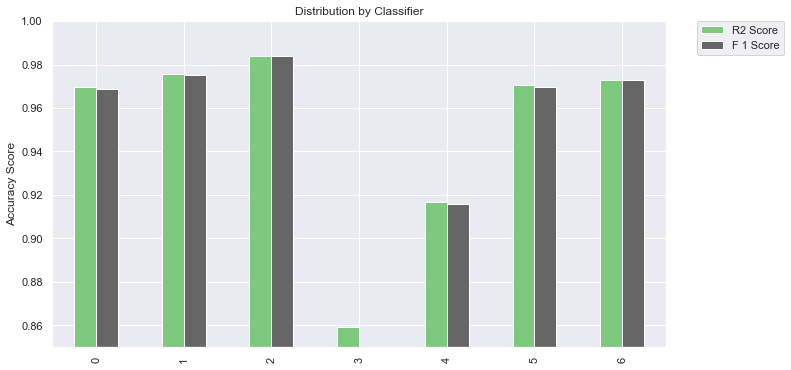

In [95]:
df_score.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(7), df_score['ML Models'].index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
mnb1 = MultinomialNB(alpha= 0.5)
mnb1.fit(X_train_cv,y_train)

y_pred_train_mnb1 = mnb1.predict(X_train_cv)
y_pred_test_mnb1  = mnb1.predict(X_test_cv)

accuracy_score_mnb1 = metrics.accuracy_score(y_pred_test_mnb1,y_test)
print('Multinomial Naive Bayes Accuracy score:', accuracy_score_mnb1)



confusion_matrix_mnb1= confusion_matrix(y_pred_test_mnb1,y_test)
print('Multinomial Naive Bayes confusion_matrix:\n ', confusion_matrix_mnb1)

classification_report_mnb1 = classification_report(y_test,y_pred_test_mnb1)
print(" Multinomial Naive Bayes Classification Report:\n", classification_report_mnb1)


Multinomial Naive Bayes Accuracy score: 0.9838565022421525
Multinomial Naive Bayes confusion_matrix:
  [[949   9]
 [  9 148]]
 Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       958
           1       0.94      0.94      0.94       157

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Multinomial Naive Bayes ROC_AUC:  0.9853463292687792


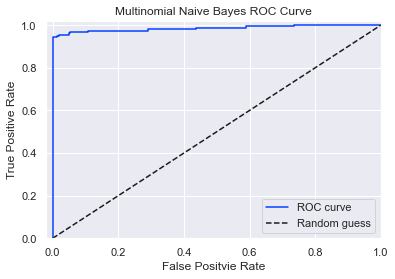

In [97]:
y_train_pred_proba = mnb1.predict_proba(X_train_cv)[:,1]
y_test_pred_proba = mnb1.predict_proba(X_test_cv)[:,1]

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds= roc_curve(y_test,y_test_pred_proba)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel("False Positvie Rate")
plt.ylabel("True Positive Rate")
plt.title("Multinomial Naive Bayes ROC Curve")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")


mnb1_roc_auc_test= roc_auc_score(y_test,y_test_pred_proba)
print("Multinomial Naive Bayes ROC_AUC: ",mnb1_roc_auc_test )


Multinomial Naive Bayes average precision score: 0.9738889669000012


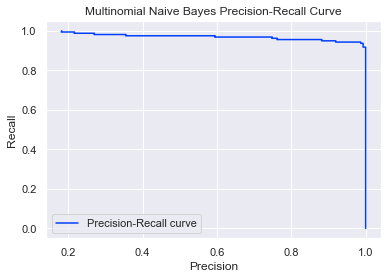

In [98]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred_proba)

plt.plot(precision, recall, label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("Multinomial Naive Bayes Precision-Recall Curve")
plt.legend(loc="lower left")

mnb1_average_precision_score =average_precision_score(y_test,y_test_pred_proba)
print("Multinomial Naive Bayes average precision score:", mnb1_average_precision_score)

<h1> Conclusion </h1>

- The results of multiple classification models applied to the SMS Spam dataset.

- From simulation results, Multinomial naive Bayes and Random Forest are among the best classifiers for SMS spam detection.

- The experimental results obtained show that the proposed method has a high capability to detect spam. 

- We can see that model is working pretty well in identifying spam messages.

- This model now can help us in identifying which message is spam and which one is not.

- The proposed method achieved 98% accuracy, F1 and R2 score which is high as compared with the other existing methods.

- Thus, the results suggest that the proposed method is more reliable for accurate and on-time detection of spam.

- Adding meaningful features such as the length of messages in number of characters, adding certain thresholds for the length, and analyzing the learning curves have been the factors that contributed to this improvement in results.

__Thank You__